<a href="https://colab.research.google.com/github/rll/deepul/blob/master/homeworks/hw2/hw2_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

## Overview
This semester, all homeworks will be conducted through Google Colab notebooks. All code for the homework assignment will be written and run in this notebook. Running in Colab will automatically provide a GPU, but you may also run this notebook locally by following [these instructions](https://research.google.com/colaboratory/local-runtimes.html) if you wish to use your own GPU.

You will save images in the notebooks to use and fill out a given LaTeX template which will be submitted to Gradescope, along with your notebook code.

## Using Colab
On the left-hand side, you can click the different icons to see a Table of Contents of the assignment, as well as local files accessible through the notebook.

Make sure to go to **Runtime -> Change runtime type** and select **GPU** as the hardware accelerator. This allows you to use a GPU. Run the cells below to get started on the assignment. Note that a session is open for a maximum of 12 hours, and using too much GPU compute may result in restricted access for a short period of time. Please start the homework early so you have ample time to work.

**If you loaded this notebook from clicking "Open in Colab" from github, you will need to save it to your own Google Drive to keep your work.**

## General Tips
In each homework problem, you will implement an flow model and run it on one to two datasets. We provide the expected outputs to help as a sanity check.

Feel free to print whatever output (e.g. debugging code, training code, etc) you want, as the graded submission will be the submitted pdf with images.

After you complete the assignment, download all of the image outputted in the results/ folder and upload them to the figure folder in the given latex template.

Run the cells below to download and load up the starter code.

In [ ]:
!if [ -d DeepGenerativeModels ]; then rm -Rf DeepGenerativeModels; fi
!git clone https://github.com/jjuke/DeepGenerativeModels.git

In [ ]:
import os

print(os.getcwd())
os.chdir("./DeepGenerativeModels")
print(os.getcwd())

In [1]:
from deepul.hw2_helper import *

* Please unzip the 'data.zip' file to the path './DeepGenerativeModels/homeworks/hw2/data'
* Please unzip the 'Q3.zip, Q4.zip, IAF.zip'file to the path './DeepGenerativeModels/exp' after make a directory 'exp'

In [25]:


# utils.py
def get_data_dir(hw_number):
    return os.path.join(os.getcwd(), "homeworks", "hw{}".format(hw_number), "data")

######################
##### Question 2 #####
######################

def visualize_q2_data():
    data_dir = get_data_dir(2)
    train_data, test_data = load_pickled_data(join(data_dir, 'shapes.pkl'))
    name = 'Shape'

    idxs = np.random.choice(len(train_data), replace=False, size=(100,))
    images = train_data[idxs] * 255
    show_samples(images, title=f'{name} Samples')

def q2_save_results(fn):
    data_dir = get_data_dir(2)
    train_data, test_data = load_pickled_data(join(data_dir, 'shapes.pkl'))

    train_losses, test_losses, samples = fn(train_data, test_data)
    samples = np.clip(samples.astype('float') * 2.0, 0, 1.9999)
    floored_samples = np.floor(samples)

    print(f'Final Test Loss: {test_losses[-1]:.4f}')
    save_training_plot(train_losses, test_losses, f'Q2 Dataset Train Plot',
                       f'results/q2_train_plot.png')
    show_samples(samples * 255.0 / 2.0, f'results/q2_samples.png')
    show_samples(floored_samples * 255.0, f'results/q2_flooredsamples.png', title='Samples with Flooring')

######################
##### Question 3 #####
######################

def visualize_q3_data():
    data_dir = get_data_dir(2)
    train_data, test_data = load_pickled_data(join(data_dir, 'celeb.pkl'))
    name = 'CelebA'

    idxs = np.random.choice(len(train_data), replace=False, size=(100,))
    images = train_data[idxs].astype(np.float32) / 3.0 * 255.0
    show_samples(images, title=f'{name} Samples')

def get_q3_data():
    data_dir = get_data_dir(2)
    train_data, test_data = load_pickled_data(join(data_dir, 'celeb.pkl'))
    return train_data, test_data


def q3_save_results(fn, part):
    data_dir = get_data_dir(2)
    train_data, test_data = load_pickled_data(join(data_dir, 'celeb.pkl'))

    train_losses, test_losses, samples, interpolations = fn(train_data, test_data)
    samples = samples.astype('float')
    interpolations = interpolations.astype('float')

    print(f'Final Test Loss: {test_losses[-1]:.4f}')
    save_training_plot(train_losses, test_losses, f'Q3 Dataset Train Plot',
                       f'results/q3_{part}_train_plot.png')
    show_samples(samples * 255.0, f'results/q3_{part}_samples.png')
    show_samples(interpolations * 255.0, f'results/q3_{part}_interpolations.png', nrow=6, title='Interpolations')

# Question 1: 2D Data

In this question, we will train two variants of flow models on continuous 2D data. 

Execute the cell below to visualize our datasets

Dataset 1


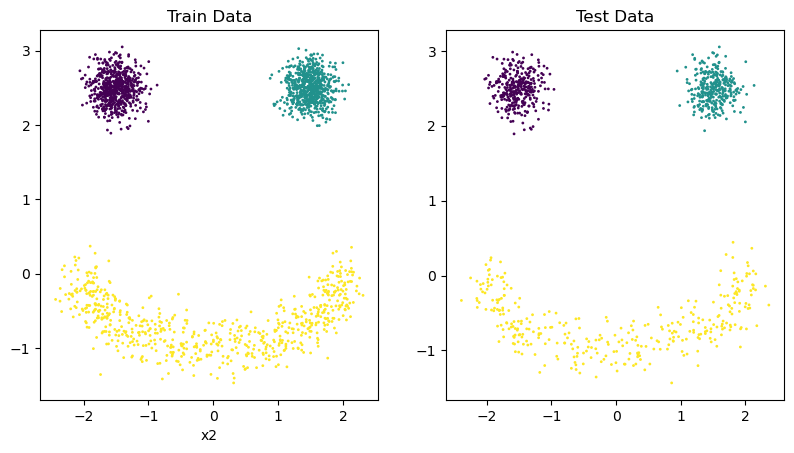

Dataset 2


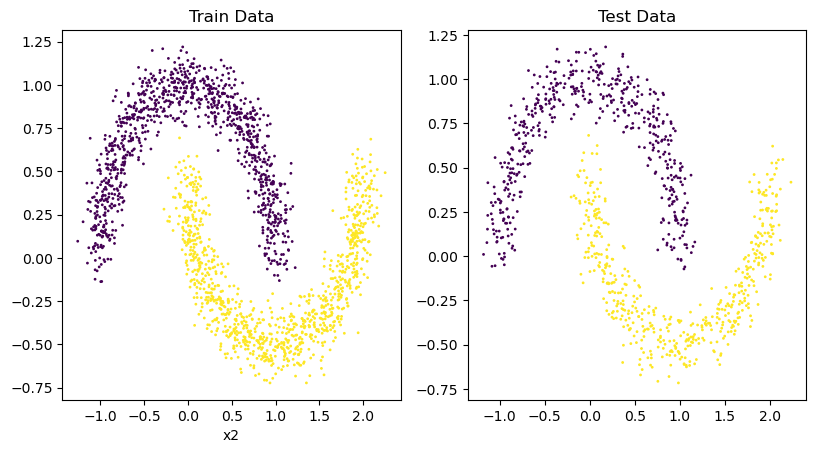

In [3]:
visualize_q1_data(dset_type=1)
visualize_q1_data(dset_type=2)

## Part (a) Autoregressive Flow [15pt]

In an autoregressive flow, we learn the transformation $z_i = f(x_i ; x_{1:i-1})$. The log-likelihood is then $\log p_\theta(x) = \sum_{i=1}^d \log p(z_i) + \log |\frac{dz_i}{dx_i}|$ because the Jacobian is triangular. For each dimension, use the CDF of a mixture of Gaussians or Logistics to map to the latent space, which should be $z_i \sim \text{Unif}[0, 1]$ i.i.d..

Fit $p_\theta$ with maximum likelihood via stochastic gradient descent on the training set. Since this is a 2D problem, you can either learn $z_0 = f(x_0)$ and $z_1 = f(x_1; x_0)$ together with a MADE model, or with separate networks. Use your favorite version of stochastic gradient descent, and optimize your hyperparameters on a validation set of your choice.

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. Show a heatmap of the densities learned by your model
4. Show what the training set looks like when mapped to the latent space. 




### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [4]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "8"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)
print("Current gpu index", os.environ["CUDA_VISIBLE_DEVICES"])
print("Current cuda device: ", torch.cuda.current_device())
print("Count of using GPUs: ", torch.cuda.device_count())

Device:  cuda
Current gpu index 8
Current cuda device:  0
Count of using GPUs:  1


In [5]:
import deepul.pytorch_util as ptu
import torch
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import trange, tqdm, tqdm_notebook

import copy
from torch.distributions.uniform import Uniform
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
from scipy.stats import norm

import numpy as np
import pickle
import time

from torch.autograd import Variable
from torchvision.utils import save_image, make_grid

import IPython

In [14]:
def train(model, train_loader, optimizer, scheduler):
    model.train()
    losses = []
    for x in train_loader:
        x = x.to(ptu.device).float().contiguous()
        loss = model.nll(x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()
        losses.append(loss.item())
    return losses

def eval_loss(model, data_loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x in data_loader:
            x = x.to(ptu.device).float().contiguous()
            loss = model.nll(x)
            total_loss += loss * x.shape[0]
        avg_loss = total_loss / len(data_loader.dataset)
    return avg_loss.item()

def train_epochs(model, train_loader, test_loader, train_args):
    epochs, lr = train_args['epochs'], train_args['lr']
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = optim.lr_scheduler.LambdaLR(optimizer=optimizer, lr_lambda=lambda epoch: 0.999 ** epoch)

    train_losses, test_losses = [], []
    test_loss = eval_loss(model, test_loader)
    test_losses.append(test_loss)  # loss at init
    for epoch in tqdm_notebook(range(epochs), desc='Epoch', leave=False):
        model.train()
        epoch_train_losses = train(model, train_loader, optimizer, scheduler) 
        train_losses.extend(epoch_train_losses)

        test_loss = eval_loss(model, test_loader)
        test_losses.append(test_loss)
            
    return train_losses, test_losses

In [15]:
class MixtureCDFFlow(nn.Module):
    def __init__(self, 
                 base_dist='uniform', 
                 mixture_dist='gaussian',
                 n_components=4,
                 plot_bounds=(-3,3)):
        super().__init__()
        self.composition = False
        if base_dist == 'uniform':
            self.base_dist = Uniform(0.0, 1.0, validate_args=False)
        else:
            raise NotImplementedError

        self.loc = nn.Parameter(torch.randn(n_components), requires_grad=True)
        self.log_scale = nn.Parameter(torch.zeros(n_components), requires_grad=True)
        self.weight_logits = nn.Parameter(torch.zeros(n_components), requires_grad=True)
        self.mixture_dist = Normal
        self.n_components = n_components
        self.plot_bounds = plot_bounds

    def flow(self, x):
        # z = cdf of x
        weights = F.softmax(self.weight_logits, dim=0).unsqueeze(0).repeat(x.shape[0], 1)
        z = (self.mixture_dist(self.loc, self.log_scale.exp()).cdf(x.unsqueeze(1).repeat(1, self.n_components)) * weights).sum(dim=1)

        # log_det = log dz/dx = log pdf(x)
        log_det = (self.mixture_dist(self.loc, self.log_scale.exp()).log_prob(x.unsqueeze(1).repeat(1, self.n_components)).exp() * weights).sum(dim=1).log()

        return z, log_det

    def log_prob(self, x):
        z, log_det = self.flow(x)
        return self.base_dist.log_prob(z) + log_det
 
    # Compute loss as negative log-likelihood
    def nll(self, x):
        return - self.log_prob(x).mean()

class MLP(nn.Module):
    def __init__(self, input_size, n_hidden, hidden_size, output_size):
        super().__init__()
        layers = []
        for _ in range(n_hidden):
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU())
            input_size = hidden_size
        layers.append(nn.Linear(hidden_size, output_size))
        self.layers = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.layers(x)

class AutoregressiveFlow(nn.Module):
    def __init__(self, 
                 dim1_mixture_dist='gaussian', 
                 dim1_n_components=5, 
                 dim2_mixture_dist='gaussian', 
                 dim2_n_components=5,
                 mlp_hidden_size=64,
                 mlp_n_layers=3):
        super().__init__()
        self.dim1_flow = MixtureCDFFlow(mixture_dist=dim1_mixture_dist, n_components=dim1_n_components).to(ptu.device)
        self.mlp = MLP(1, mlp_n_layers, mlp_hidden_size, dim2_n_components * 3).to(ptu.device)
        self.dim2_n_components = dim2_n_components
        self.base_dist = Uniform(ptu.tensor(0.0), ptu.tensor(1.0), validate_args=False)
        self.mixture_dist = Normal

    def flow(self, x):
        # individually flow on each dim
        x1, x2 = torch.chunk(x, 2, dim=1)
        # dim 1 
        z1, log_det1 = self.dim1_flow.flow(x1.squeeze())
        
        # dim1
        loc, log_scale, weight_logits = torch.chunk(self.mlp(x1), 3, dim=1)
        weights = F.softmax(weight_logits, dim=1)
        z2 = (self.mixture_dist(loc, log_scale.exp()).cdf(
            x2.repeat(1, self.dim2_n_components)) * weights).sum(dim=1)
        log_det2 = (self.mixture_dist(loc, log_scale.exp()).log_prob(
            x2.repeat(1, self.dim2_n_components)).exp() * weights).sum(dim=1).log()
        return torch.cat([z1.unsqueeze(1), z2.unsqueeze(1)], dim=1), torch.cat([log_det1.unsqueeze(1), log_det2.unsqueeze(1)], dim=1)

    def log_prob(self, x):
        z, log_det = self.flow(x)
        return (self.base_dist.log_prob(z) + log_det).mean(dim=1) # shape: [batch_size, dim]

    def nll(self, x):
        return - self.log_prob(x).mean()

In [16]:
def q1_a(train_data, test_data, dset_id):
    """
    train_data: An (n_train, 2) numpy array of floats in R^2
    test_data: An (n_test, 2) numpy array of floats in R^2
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
             used to set different hyperparameters for different datasets, or
             for plotting a different region of densities

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (?,) of probabilities with values in [0, +infinity). 
      Refer to the commented hint.
    - a numpy array of size (n_train, 2) of floats in [0,1]^2. This represents 
      mapping the train set data points through our flow to the latent space. 
    """

    """ YOUR CODE HERE """
    # create data loaders
    loader_args = dict(batch_size=128, shuffle=True)
    train_loader = data.DataLoader(train_data, **loader_args)
    test_loader = data.DataLoader(test_data, **loader_args)

    # model
    ar_flow = AutoregressiveFlow()

    # train
    train_losses, test_losses = train_epochs(ar_flow, train_loader, test_loader, dict(epochs=100, lr=5e-3))

    # heatmap
    dx, dy = 0.025, 0.025
    if dset_id == 1:  # face
        x_lim = (-4, 4)
        y_lim = (-4, 4)
    elif dset_id == 2:  # two moons
        x_lim = (-1.5, 2.5)
        y_lim = (-1, 1.5)
    y, x = np.mgrid[slice(y_lim[0], y_lim[1] + dy, dy),
                  slice(x_lim[0], x_lim[1] + dx, dx)]
    mesh_xs = ptu.FloatTensor(np.stack([x, y], axis=2).reshape(-1, 2))
    densities = np.exp(ptu.get_numpy(ar_flow.log_prob(mesh_xs)))

    # latents
    z, _ = ar_flow.flow(ptu.FloatTensor(train_data))
    latents = ptu.get_numpy(z)

    return train_losses, test_losses, densities, latents

### Results

Once you've implemented `q1_a`, execute the cells below to visualize and save your results



/tmp/ipykernel_3034937/3260764324.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc='Epoch', leave=False):


Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Final Test Loss: 0.6561


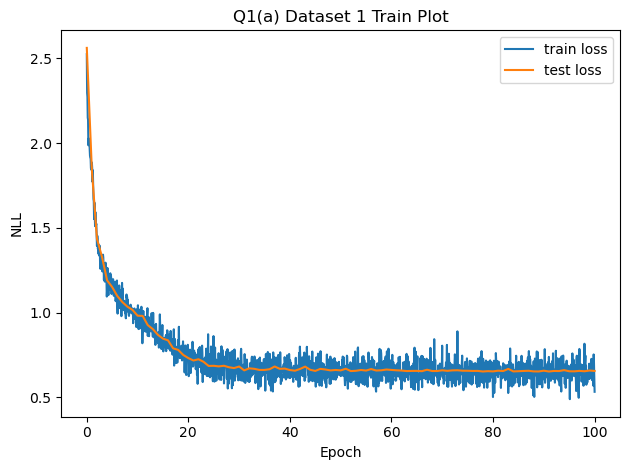

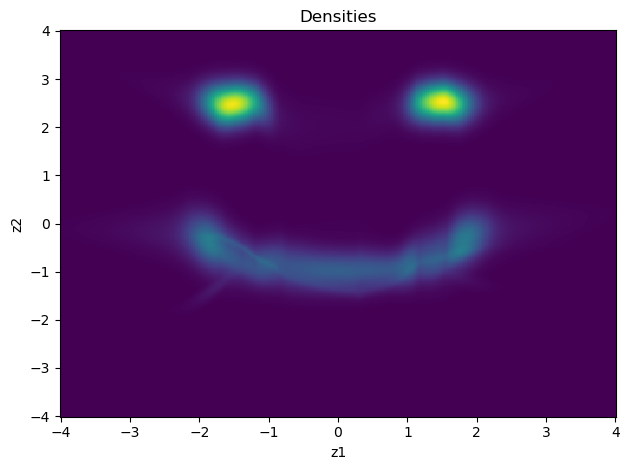

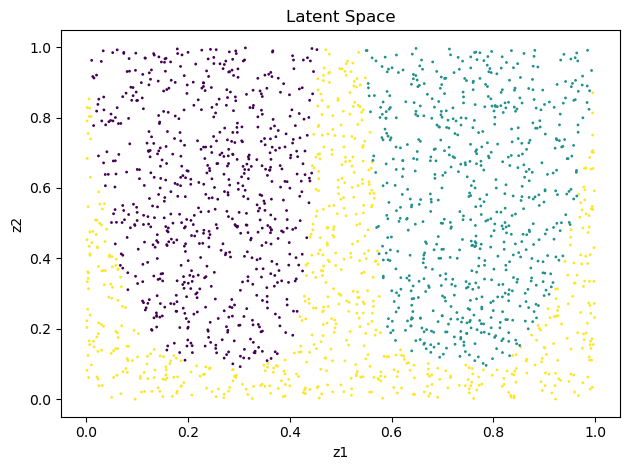

In [17]:
q1_save_results(1, 'a', q1_a)

/tmp/ipykernel_3034937/3260764324.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc='Epoch', leave=False):


Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Final Test Loss: 0.5602


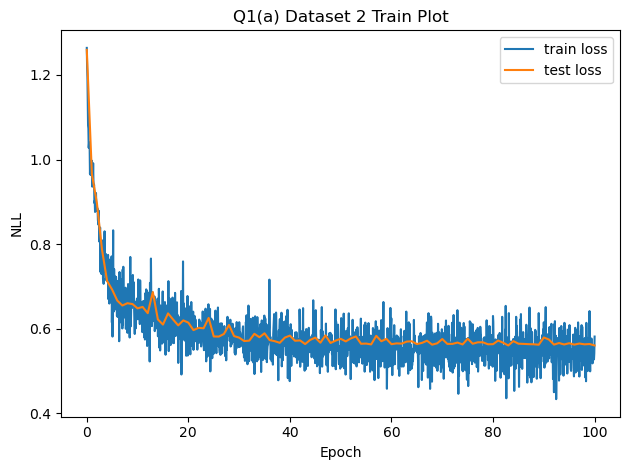

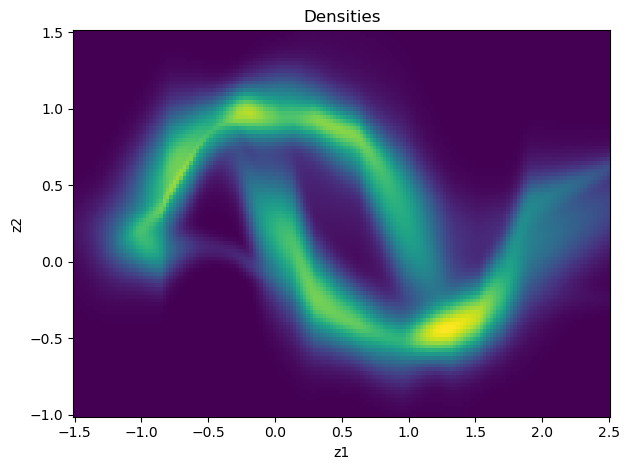

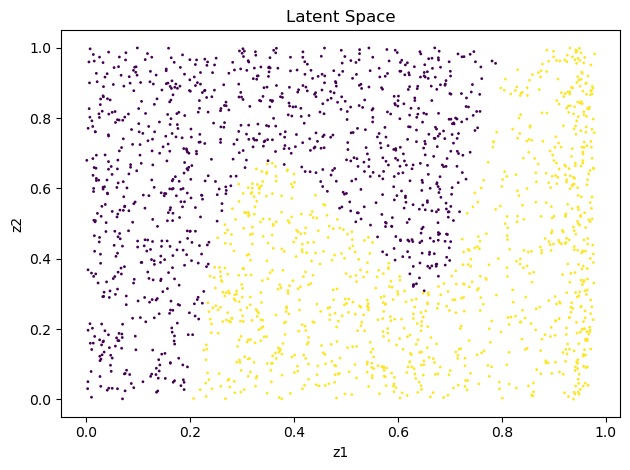

In [18]:
q1_save_results(2, 'a', q1_a)

## Part (b) RealNVP [15pt]
In this part, we want to train a flow with the following structure: 
$(z_1, z_2) = (f_{\theta, 1} \circ \cdots \circ f_{\theta, n})$, 
where each $f_{\theta, i}$ is an affine transformation of 1 dimension, conditioned on the other, and $z \sim N(0, I)$. According to [Density Estimation Using Real NVP](https://arxiv.org/abs/1605.08803) Section 4.1, there's a particularly good way to parameterize the affine transformation:

Assuming that we're conditioning on $x_1$ and transforming $x_2$, we have 

- $z_1 = x_1$

- $ \text{log_scale} = \text{scale} \times tanh(g_{\theta, \text{scale}}(x_1)) + \text{scale_shift}$

- $z_2 = exp(\text{log_scale}) \times x_2 + g_{\theta, \text{shift}}(x_1)$

where $g_\theta$, $\text{scale}$, and $\text{scale_shift}$ are all learned parameters.


**Train a RealNVP model and provide the same set of corresponding deliverables as part (a)**

### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [19]:
class AffineTransform(nn.Module):
    def __init__(self, type, n_hidden=2, hidden_size=256):
        super().__init__()
        self.mask = self.build_mask(type=type)
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.mlp = MLP(input_size=2, n_hidden=n_hidden, hidden_size=hidden_size, output_size=2)

    def build_mask(self, type):
        # if type == "left", left half is a one
        # if type == right", right half is a one
        assert type in {"left", "right"}
        if type == "left":
            mask = ptu.FloatTensor([1.0, 0.0])
        elif type == "right":
            mask = ptu.FloatTensor([0.0, 1.0])
        else:
            raise NotImplementedError
        return mask

    def forward(self, x, reverse=False):
        # returns transform(x), log_det
        batch_size = x.shape[0]
        mask = self.mask.repeat(batch_size, 1)
        x_ = x * mask

        log_s, t = self.mlp(x_).split(1, dim=1) #todo: fix
        log_s = self.scale * torch.tanh(log_s) + self.scale_shift
        t = t * (1.0 - mask)
        log_s = log_s * (1.0 - mask)

        if reverse:  # inverting the transformation
            x = (x - t) * torch.exp(-log_s)
        else:
            x = x * torch.exp(log_s) + t
        return x, log_s

class SigmoidFlow(nn.Module):
    def forward(self, x, reverse=False):        
        if reverse:
            z = - torch.log(torch.reciprocal(x) - 1)
        else:
            z = torch.sigmoid(x)
        return z, z.log() + (1-z).log()

class RealNVP(nn.Module):
    def __init__(self, 
                 transforms):
        super().__init__()

        self.prior = torch.distributions.Normal(torch.tensor(0.).to(ptu.device), torch.tensor(1.).to(ptu.device), validate_args=False)
        self.transforms = nn.ModuleList(transforms)
        
    def flow(self, x):
        # maps x -> z, and returns the log determinant (not reduced)
        z, log_det = x, torch.zeros_like(x)
        for op in self.transforms:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        return z, log_det

    def invert_flow(self, z):
        # z -> x (inverse of f)
        for op in reversed(self.transforms):
            z, _ = op.forward(z, reverse=True)
        return z

    def log_prob(self, x):
        z, log_det = self.flow(x)
        return torch.sum(log_det, dim=1) + torch.sum(self.prior.log_prob(z), dim=1)

    def sample(self, num_samples):
        z = self.prior.sample([num_samples, 2])
        return self.invert_flow(z)

    def nll(self, x):
        return - self.log_prob(x).mean()

In [20]:
def q1_b(train_data, test_data, dset_id):
    """
    train_data: An (n_train, 2) numpy array of floats in R^2
    test_data: An (n_test, 2) numpy array of floats in R^2
    dset_id: An identifying number of which dataset is given (1 or 2). Most likely
             used to set different hyperparameters for different datasets, or
             for plotting a different region of densities

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (?,) of probabilities with values in [0, +infinity). 
      Refer to the commented hint.
    - a numpy array of size (n_train, 2) of floats in R^2. This represents 
      mapping the train set data points through our flow to the latent space. 
    """

    """ YOUR CODE HERE """
    # create data loaders
    loader_args = dict(batch_size=128, shuffle=True)
    train_loader = data.DataLoader(train_data, **loader_args)
    test_loader = data.DataLoader(test_data, **loader_args)

    # model
    real_nvp = RealNVP([AffineTransform("left", n_hidden=2, hidden_size=64),
                    AffineTransform("right", n_hidden=2, hidden_size=64),
                    AffineTransform("left", n_hidden=2, hidden_size=64),
                    AffineTransform("right", n_hidden=2, hidden_size=64),
                    AffineTransform("left", n_hidden=2, hidden_size=64),
                    AffineTransform("right", n_hidden=2, hidden_size=64)])

    # train
    train_losses, test_losses = train_epochs(real_nvp, train_loader, test_loader, dict(epochs=250, lr=5e-3))

    # heatmap
    dx, dy = 0.025, 0.025
    if dset_id == 1:  # face
        x_lim = (-4, 4)
        y_lim = (-4, 4)
    elif dset_id == 2:  # two moons
        x_lim = (-1.5, 2.5)
        y_lim = (-1, 1.5)
    y, x = np.mgrid[slice(y_lim[0], y_lim[1] + dy, dy),
                  slice(x_lim[0], x_lim[1] + dx, dx)]
    mesh_xs = ptu.FloatTensor(np.stack([x, y], axis=2).reshape(-1, 2))
    densities = np.exp(ptu.get_numpy(real_nvp.log_prob(mesh_xs)))

    # latents
    z, _ = real_nvp.flow(ptu.FloatTensor(train_data))
    latents = ptu.get_numpy(z)
    
    return train_losses, test_losses, densities, latents

### Results

Once you've implemented `q1_b`, execute the cells below to visualize and save your results



/tmp/ipykernel_3034937/3260764324.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc='Epoch', leave=False):


Epoch:   0%|          | 0/250 [00:00<?, ?it/s]

Final Test Loss: 1.3437


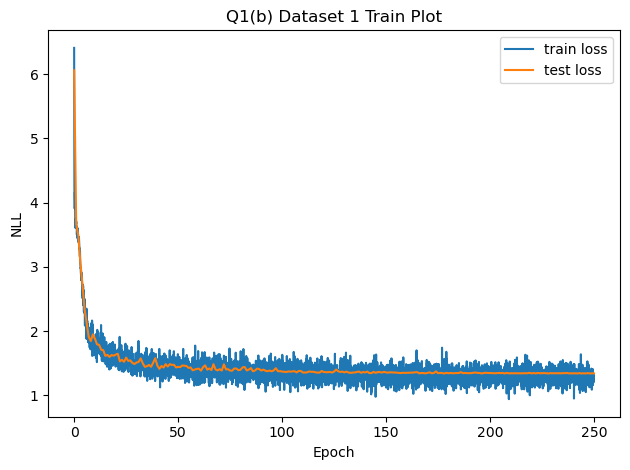

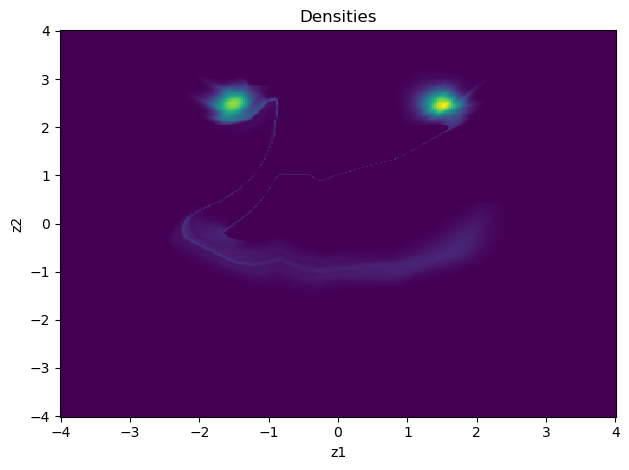

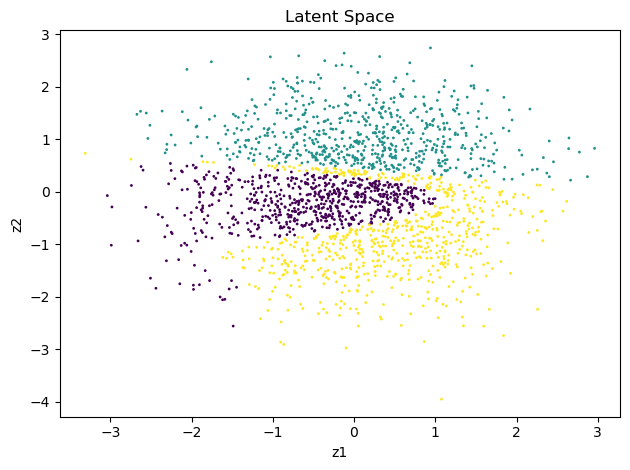

In [21]:
q1_save_results(1, 'b', q1_b)

/tmp/ipykernel_3034937/3260764324.py:33: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc='Epoch', leave=False):


Epoch:   0%|          | 0/250 [00:00<?, ?it/s]

Final Test Loss: 1.1180


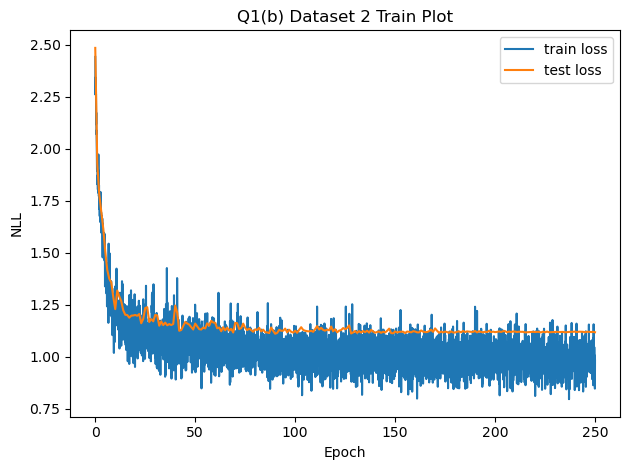

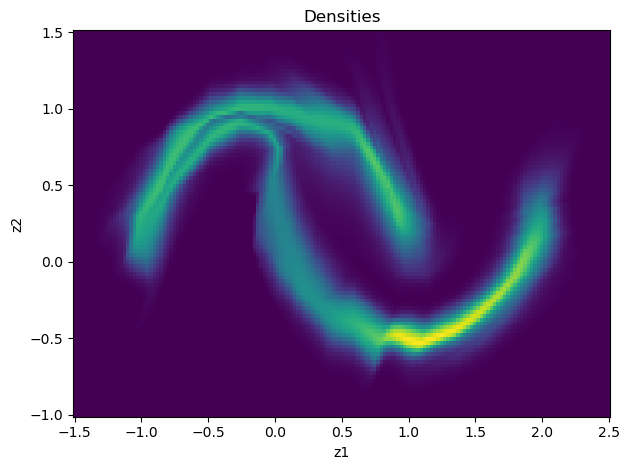

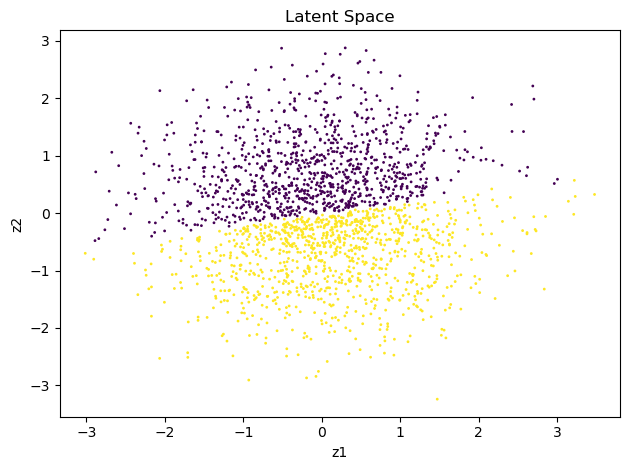

In [22]:
q1_save_results(2, 'b', q1_b)

# Question 2: Autoregressive Flows for Images [20pt]
We can scale up the autoregressive flows from 1(a) to high-dimensional image data. In this question, we will focus on the black-and-white shapes dataset from Homework 1.

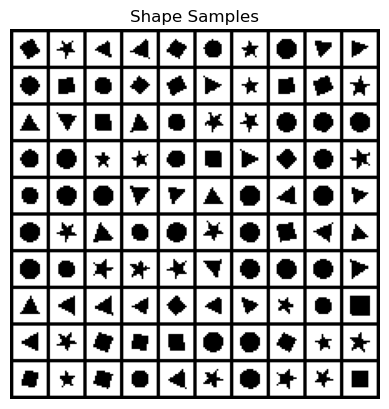

In [26]:
visualize_q2_data()

Adapt your PixelCNN implementation from Homework 1 and use it as an autoregressive flow model on the black-and-white shapes dataset. Using the base architecture from Homework 1 3(a), output a mixture of logistics or gaussians (instead of logits), whose CDF we will use as our flow for each dimension of x. 

Remember: you must dequantize the data and scale it between 0 and 1 for the autoregressive flow to have stable training. 

**You will provide these deliverables**

1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. **Make sure to account for any rescaling you do in your nats/dim.**
2.   Report the final test set performance of your final model
3. 100 samples from your autoregressive flow. Our plotting code will show your samples, with and without clipping and flooring (to remove the quantization). 


### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [27]:
def train_with_dequantization_q2(model, train_loader, optimizer):
    model.train()
    losses = []
    for x in train_loader:
        x = x.to(ptu.device).float().contiguous()
        x += torch.distributions.Uniform(0.0, 0.5).sample(x.shape).to(ptu.device)
        loss = model.nll(x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

def train_epochs_q2(model, train_loader, test_loader, train_args):
    epochs, lr = train_args['epochs'], train_args['lr']
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses, test_losses = [], []
    test_loss = eval_loss(model, test_loader)
    test_losses.append(test_loss)  # loss at init
    for epoch in tqdm_notebook(range(epochs), desc='Epoch', leave=False):
        model.train()
        epoch_train_losses = train_with_dequantization_q2(model, train_loader, optimizer) 
        train_losses.extend(epoch_train_losses)

        test_loss = eval_loss(model, test_loader)
        test_losses.append(test_loss)
            
    return train_losses, test_losses

In [28]:
ptu.set_gpu_mode(True)

class MaskConv2d(nn.Conv2d):
    def __init__(self, mask_type, *args, **kwargs):
        assert mask_type == 'A' or mask_type == 'B'
        super().__init__(*args, **kwargs)
        self.register_buffer('mask', torch.zeros_like(self.weight))
        self.create_mask(mask_type)

    def forward(self, input, cond=None):
        batch_size = input.shape[0]
        out = F.conv2d(input, self.weight * self.mask, self.bias, self.stride,
                       self.padding, self.dilation, self.groups)
        return out

    def create_mask(self, mask_type):
        k = self.kernel_size[0]
        self.mask[:, :, :k // 2] = 1
        self.mask[:, :, k // 2, :k // 2] = 1
        if mask_type == 'B':
            self.mask[:, :, k // 2, k // 2] = 1

class ResBlock(nn.Module):
    def __init__(self, in_channels, **kwargs):
        super().__init__()
        self.block = nn.ModuleList([
            nn.ReLU(),
            MaskConv2d('B', in_channels, in_channels // 2, 1, **kwargs),
            nn.ReLU(),
            MaskConv2d('B', in_channels // 2, in_channels // 2, 7, padding=3, **kwargs),
            nn.ReLU(),
            MaskConv2d('B', in_channels // 2, in_channels, 1, **kwargs)
        ])

    def forward(self, x, cond=None):
        out = x
        for layer in self.block:
            if isinstance(layer, MaskConv2d):
                out = layer(out, cond=cond)
            else:
                out = layer(out)
        return out + x

class LayerNorm(nn.LayerNorm):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def forward(self, x):
        x = x.permute(0, 2, 3, 1).contiguous()
        x_shape = x.shape
        x = super().forward(x)
        return x.permute(0, 3, 1, 2).contiguous()

class AutoregressiveFlowPixelCNN(nn.Module):
    def __init__(self, input_shape, n_filters=64,
               kernel_size=7, n_layers=5, use_resblock=False, 
               n_components=2, **kwargs):
        super().__init__()
        assert n_layers >= 2
        n_channels = input_shape[0]

        if use_resblock:
            block_init = lambda: ResBlock(n_filters, **kwargs)
        else:    
            block_init = lambda: MaskConv2d('B', n_filters, n_filters, 
                                          kernel_size=kernel_size,
                                          padding=kernel_size // 2, **kwargs)

        model = nn.ModuleList([MaskConv2d('A', n_channels, n_filters, 
                                          kernel_size=kernel_size,
                                          padding=kernel_size // 2, **kwargs)])
        for _ in range(n_layers):
            model.append(LayerNorm(n_filters))
            model.extend([nn.ReLU(), block_init()])
        model.extend([nn.ReLU(), MaskConv2d('B', n_filters, n_filters, 1, **kwargs)])
        model.extend([nn.ReLU(), MaskConv2d('B', n_filters, n_components * 3 * n_channels, 1, **kwargs)])

        self.net = model
        self.input_shape = input_shape
        self.n_channels = n_channels
        self.n_components = n_components

    def forward(self, x, cond=None):
        batch_size = x.shape[0]
        out = x.float()
        for layer in self.net:
            if isinstance(layer, MaskConv2d) or isinstance(layer, ResBlock):
                out = layer(out, cond=cond)
            else:
                out = layer(out)
        return out.view(batch_size, 3 * self.n_components, *self.input_shape) # todo: fix this line

    def nll(self, x, cond=None):
        loc, log_scale, weight_logits = torch.chunk(self.forward(x), 3, dim=1)
        weights = F.softmax(weight_logits, dim=1) #.repeat(1, 1, self.n_components, 1, 1)
        log_det_jacobian = Normal(loc, log_scale.exp()).log_prob(x.unsqueeze(1).repeat(1,1,self.n_components,1,1))
        return -log_det_jacobian.mean()

    def sample(self, n, cond=None):
        samples = torch.zeros(n, *self.input_shape).cuda()
        with torch.no_grad():
            for r in range(self.input_shape[1]):
                for c in range(self.input_shape[2]):
                    for k in range(self.n_channels):
                        loc, log_scale, weight_logits = torch.chunk(self.forward(samples), 3, dim=1)
                        loc, log_scale, weight_logits = loc[:,:,k,r,c], log_scale[:,:,k,r,c], weight_logits[:,:,k,r,c]
                        probs = F.softmax(weight_logits, dim=1)
                        chosen_centers = torch.multinomial(probs, 1).squeeze(-1)
                        samples[:, k, r, c] = torch.normal(loc[torch.arange(n), chosen_centers], log_scale[torch.arange(n), chosen_centers].exp())
        return samples.permute(0, 2, 3, 1).cpu().numpy()

In [29]:
def q2(train_data, test_data):
    """
    train_data: A (n_train, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
    test_data: A (n_test, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
    H = W = 20
    Note that you should dequantize your train and test data, your dequantized pixels should all lie in [0,1]

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 1) of samples with values in [0, 1], where [0,0.5] represents a black pixel
      and [0.5,1] represents a white pixel. We will show your samples with and without noise. 
    """
  
    """ YOUR CODE HERE """
    train_data = np.transpose(train_data, (0, 3, 1, 2)).astype(np.float32) / 2.0
    test_data = np.transpose(test_data, (0, 3, 1, 2)).astype(np.float32) / 2.0
    # train_data = train_data + np.random.uniform(high=0.5, size=train_data.shape)
    test_data = test_data + np.random.uniform(high=0.5, size=test_data.shape)

    H, W = 20, 20
    model = AutoregressiveFlowPixelCNN((1, H, W), n_layers=5, n_components=10).cuda()

    train_loader = data.DataLoader(train_data, batch_size=128, shuffle=True)
    test_loader = data.DataLoader(test_data, batch_size=128)
    train_losses, test_losses = train_epochs_q2(model, train_loader, test_loader, 
                                           dict(epochs=20, lr=1e-3))
    samples = model.sample(100)
    return train_losses + np.log(2), test_losses + np.log(2), samples

### Results

Once you've implemented `q2`, execute the cells below to visualize and save your results



/tmp/ipykernel_3034937/425069298.py:21: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(epochs), desc='Epoch', leave=False):


Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Final Test Loss: 0.2220


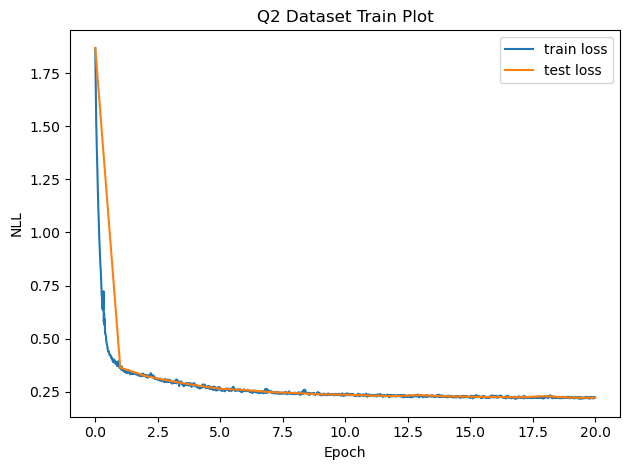

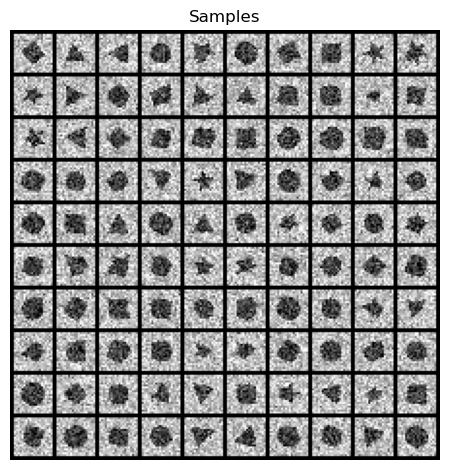

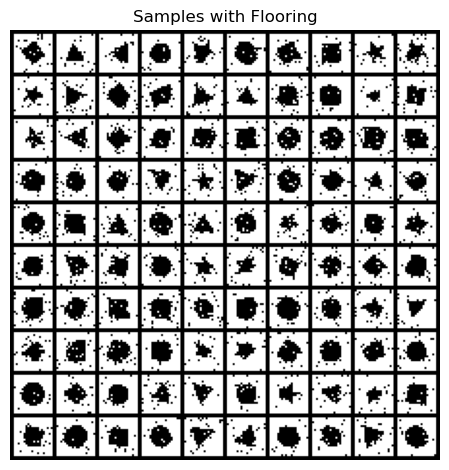

In [30]:
q2_save_results(q2)

# Question 3: RealNVP on Higher Dimensions


In this problem, you will train a flow model to invertibly map a high dimensional dataset of celebrity
faces to gaussian noise. The dataset is a low-resolution (32 × 32) version of the CelebA-HQ dataset that has been quantized to 2 bits per color channel.



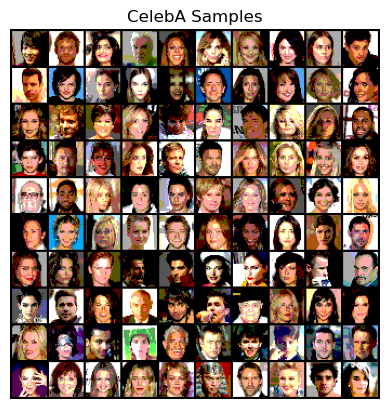

In [31]:
visualize_q3_data()

## Part (a): RealNVP [40pt]

Use the affine coupling flow from RealNVP and a form of [data-dependent initialization](https://arxiv.org/abs/1602.07868) that normalizes activations from an initial forward pass with a minibatch.
We describe a reference architecture below that can achieve good performance, but you are free
and encouraged to use different architectures and/or structure your code differently.



```
Preprocess() # dequantization, logit trick from RealNVP (Dinh et al) Section 4.1

for _ in range(4):
  AffineCouplingWithCheckerboard() # Figure 3 in Dinh et al - (left)
  ActNorm() # described in Glow (Kingma & Dhariwal) Section 3.1
Squeeze(), # [b, c, h, w] --> [b, c*4, h//2, w//2]

for _ in range(3):
  AffineCouplingWithChannel()
  ActNorm()
Unsqueeze(), # [b, c*4, h//2, w//2] --> [b, c, h, w]

for _ in range(3):
  AffineCouplingWithCheckerboard()
  ActNorm()
```



Here, we provide pseudocode for the basic structure of each coupling layer. 



```
# pseudocode
ResnetBlock: n_filters
  h = x
  h = conv2d(n_filters, n_filters, (1,1), stride=1, padding=0)(h)
  h = relu(h)
  h = conv2d(n_filters, n_filters, (3,3), stride=1, padding=1)(h)
  h = relu(h)
  h = conv2d(n_filters, n_filters, (1,1), stride=1, padding=0)(h)
  return h + x

SimpleResnet: n_filters = 128, n_blocks = 8, n_out
  conv2d(in_channels, n_filters=n_filters, (3,3), stride=1, padding=1)
  apply 8 ResnetBlocks with n_filters=n_filters
  relu()
  conv2d(in_channels=n_filters, out_channels=n_out, (3,3), stride=1, padding=1)
  
AffineCoupling(x, mask):
  x_ = x * mask
  log_s, t = torch.chunk(SimpleResnet(x_), 2, dim=1)
  # calculate log_scale, as done in Q1(b)
  t = t * (1.0 - mask)
  log_scale = log_scale * (1.0 - mask)
  z = x * torch.exp(log_scale) + t
  log_det_jacobian = log_scale
  return z, log_det_jacobian
```



We use an Adam Optimizer with a warmup over 200 steps till a learning rate of 5e-4. We didn’t decay the learning rate but it is a generally recommended practice while training generative models. We show samples from our model at the end of training, as well as interpolations between several images in our dataset.  Our reference solution achieves a test loss of about 0.55 bits/dim after 100 epochs. 



**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model
4. 5 rows of interpolations between images in the test set; each row consists of the start and end images, and 4 intermediate ones. You should return 30 total images. 



### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [35]:
# for DDP trained model
from torch.utils.data import DataLoader
import torch.distributed as dist
from torch.utils.data import Dataset, DataLoader #, random_split
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.utils.data.distributed import DistributedSampler

os.environ['MASTER_ADDR'] = 'localhost'
os.environ['MASTER_PORT'] = '12355'

dist.init_process_group(backend='nccl', rank=0, world_size=1)

In [36]:
device = "cuda" 

# conv2d with weight normalization
class WeightNormConv2d(nn.Module):
    def __init__(self, in_dim, out_dim, kernel_size, stride=1, padding=0,
                 bias=True):
        super(WeightNormConv2d, self).__init__()
        self.conv = nn.utils.weight_norm(
            nn.Conv2d(in_dim, out_dim, kernel_size,
                      stride=stride, padding=padding, bias=bias))

    def forward(self, x):
        return self.conv(x)

class ActNorm(nn.Module):
    def __init__(self, n_channels):
        super(ActNorm, self).__init__()
        self.log_scale = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.shift = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.n_channels = n_channels
        self.initialized = False

    def forward(self, x, reverse=False):
        if reverse:
            return (x - self.shift) * torch.exp(-self.log_scale), self.log_scale
        else:
            if not self.initialized:
                self.shift.data = -torch.mean(x, dim=[0, 2, 3], keepdim=True)
                self.log_scale.data = - torch.log(
                    torch.std(x.permute(1, 0, 2, 3).reshape(self.n_channels, -1), dim=1).reshape(1, self.n_channels, 1,
                                                                                                 1))
                self.initialized = True
                result = x * torch.exp(self.log_scale) + self.shift
            return x * torch.exp(self.log_scale) + self.shift, self.log_scale

class ResnetBlock(nn.Module):
    def __init__(self, dim):
        super(ResnetBlock, self).__init__()
        self.block = nn.Sequential(
            WeightNormConv2d(dim, dim, (1, 1), stride=1, padding=0),
            nn.ReLU(),
            WeightNormConv2d(dim, dim, (3, 3), stride=1, padding=1),
            nn.ReLU(),
            WeightNormConv2d(dim, dim, (1, 1), stride=1, padding=0))

    def forward(self, x):
        return x + self.block(x)

class SimpleResnet(nn.Module):
    def __init__(self, in_channels=3, out_channels=6, n_filters=128, n_blocks=8):
        super(SimpleResnet, self).__init__()
        layers = [WeightNormConv2d(in_channels, n_filters, (3, 3), stride=1, padding=1),
                  nn.ReLU()]
        for _ in range(n_blocks):
            layers.append(ResnetBlock(n_filters))
        layers.append(nn.ReLU())
        layers.append(WeightNormConv2d(n_filters, out_channels, (3, 3), stride=1, padding=1))
        self.resnet = nn.Sequential(*layers)

    def forward(self, x):
        return self.resnet(x)

class AffineCheckerboardTransform(nn.Module):
    def __init__(self, type=1.0):
        super(AffineCheckerboardTransform, self).__init__()
        self.mask = self.build_mask(type=type)
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.resnet = SimpleResnet()

    def build_mask(self, type=1.0):
        # if type == 1.0, the top left corner will be 1.0
        # if type == 0.0, the top left corner will be 0.0
        mask = np.arange(32).reshape(-1, 1) + np.arange(32)
        mask = np.mod(type + mask, 2)
        mask = mask.reshape(-1, 1, 32, 32)
        return torch.tensor(mask.astype('float32')).to(device)

    def forward(self, x, reverse=False):
        # returns transform(x), log_det
        batch_size, n_channels, _, _ = x.shape
        mask = self.mask.repeat(batch_size, 1, 1, 1)
        x_ = x * mask

        log_s, t = self.resnet(x_).split(n_channels, dim=1)
        log_s = self.scale * torch.tanh(log_s) + self.scale_shift
        t = t * (1.0 - mask)
        log_s = log_s * (1.0 - mask)

        if reverse:  # inverting the transformation
            x = (x - t) * torch.exp(-log_s)
        else:
            x = x * torch.exp(log_s) + t
        return x, log_s

class AffineChannelTransform(nn.Module):
    def __init__(self, modify_top):
        super(AffineChannelTransform, self).__init__()
        self.modify_top = modify_top
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.resnet = SimpleResnet(in_channels=6, out_channels=12)

    def forward(self, x, reverse=False):
        n_channels = x.shape[1]
        if self.modify_top:
            on, off = x.split(n_channels // 2, dim=1)
        else:
            off, on = x.split(n_channels // 2, dim=1)
        log_s, t = self.resnet(off).split(n_channels // 2, dim=1)
        log_s = self.scale * torch.tanh(log_s) + self.scale_shift

        if reverse:  # inverting the transformation
            on = (on - t) * torch.exp(-log_s)
        else:
            on = on * torch.exp(log_s) + t

        if self.modify_top:
            return torch.cat([on, off], dim=1), torch.cat([log_s, torch.zeros_like(log_s)], dim=1)
        else:
            return torch.cat([off, on], dim=1), torch.cat([torch.zeros_like(log_s), log_s], dim=1)

class RealNVP(nn.Module):
    def __init__(self):
        super(RealNVP, self).__init__()

        self.prior = torch.distributions.Normal(torch.tensor(0.).to(device), torch.tensor(1.).to(device))
        # self.prior = torch.distributions.Normal(torch.tensor(0.).to(device), torch.tensor(1.).to(device))
        self.checker_transforms1 = nn.ModuleList([
            AffineCheckerboardTransform(1.0),
            ActNorm(3),
            AffineCheckerboardTransform(0.0),
            ActNorm(3),
            AffineCheckerboardTransform(1.0),
            ActNorm(3),
            AffineCheckerboardTransform(0.0)
        ])

        self.channel_transforms = nn.ModuleList([
            AffineChannelTransform(True),
            ActNorm(12),
            AffineChannelTransform(False),
            ActNorm(12),
            AffineChannelTransform(True),
        ])

        self.checker_transforms2 = nn.ModuleList([
            AffineCheckerboardTransform(1.0),
            ActNorm(3),
            AffineCheckerboardTransform(0.0),
            ActNorm(3),
            AffineCheckerboardTransform(1.0)
        ])

    def squeeze(self, x):
        # C x H x W -> 4C x H/2 x W/2
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C, H // 2, 2, W // 2, 2)
        x = x.permute(0, 1, 3, 5, 2, 4)
        x = x.reshape(B, C * 4, H // 2, W // 2)
        return x

    def unsqueeze(self, x):
        #  4C x H/2 x W/2  ->  C x H x W
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C // 4, 2, 2, H, W)
        x = x.permute(0, 1, 4, 2, 5, 3)
        x = x.reshape(B, C // 4, H * 2, W * 2)
        return x

    def g(self, z):
        # z -> x (inverse of f)
        x = z
        for op in reversed(self.checker_transforms2):
            x, _ = op.forward(x, reverse=True)
        x = self.squeeze(x)
        for op in reversed(self.channel_transforms):
            x, _ = op.forward(x, reverse=True)
        x = self.unsqueeze(x)
        for op in reversed(self.checker_transforms1):
            x, _ = op.forward(x, reverse=True)
        return x

    def f(self, x):
        # maps x -> z, and returns the log determinant (not reduced)
        z, log_det = x, torch.zeros_like(x)
        for op in self.checker_transforms1:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        z, log_det = self.squeeze(z), self.squeeze(log_det)
        for op in self.channel_transforms:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        z, log_det = self.unsqueeze(z), self.unsqueeze(log_det)
        for op in self.checker_transforms2:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        return z, log_det

    def log_prob(self, x):
        z, log_det = self.f(x)
        return torch.sum(log_det, [1, 2, 3]) + torch.sum(self.prior.log_prob(z), [1, 2, 3])

    def sample(self, num_samples):
        z = self.prior.sample([num_samples, 3, 32, 32])
        return self.g(z)

class Solver(object):
    def __init__(self, learning_rate=5e-4, n_epochs=128):
        self.train_loader, self.val_loader = self.create_loaders()
        self.log_interval = 100
        self.n_epochs = n_epochs
        self.learning_rate = learning_rate
        self.n_batches_in_epoch = len(self.train_loader)

    def build(self):
        self.flow = RealNVP().to(device)
        self.optimizer = torch.optim.Adam(self.flow.parameters(), lr=self.learning_rate)
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=self.optimizer, lr_lambda=lambda epoch:0.95**epoch)

    def create_loaders(self):
        train, test = get_q3_data()
        train = np.transpose(train, axes=[0, 3, 1, 2])  # NCHW 20000 x 3 x 32 x 32
        test = np.transpose(test, axes=[0, 3, 1, 2])  # NCHW 6838 x 3 x 32 x 32
        train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=False, pin_memory=False)
        test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False, pin_memory=False)
        return train_loader, test_loader

    def preprocess(self, x, reverse=False, dequantize=True):
        if reverse:  # doesn't map back to [0, 4]
            x = 1.0 / (1 + torch.exp(-x))
            x -= 0.05
            x /= 0.9
            return x
        else:
            # dequantization
            if dequantize:
                x += torch.distributions.Uniform(0.0, 1.0).sample(x.shape).to(device)
            x /= 4.0

            # logit operation
            x *= 0.9
            x += 0.05
            logit = torch.log(x) - torch.log(1.0 - x)
            log_det = torch.nn.functional.softplus(logit) + torch.nn.functional.softplus(-logit) \
                      + torch.log(torch.tensor(0.9)) - torch.log(torch.tensor(4.0))
            return logit, torch.sum(log_det, dim=(1, 2, 3))

    def train(self):
        train_losses = []
        val_losses = []
        for epoch_i in range(self.n_epochs):
            epoch_i += 1

            self.flow.train()
            self.batch_loss_history = []

            for batch_i, image in enumerate(tqdm_notebook(
                    self.train_loader, desc='Batch', leave=False)):

                batch_i += 1
                # [batch_size, 3, 32, 32]
                image = Variable(image).to(device)
                logit_x, log_det = self.preprocess(image.float())
                log_prob = self.flow.log_prob(logit_x)
                log_prob += log_det

                batch_loss = -torch.mean(log_prob) / (3.0 * 32.0 * 32.0)

                self.optimizer.zero_grad()
                batch_loss.backward()
                self.optimizer.step()
                self.scheduler.step()

                batch_loss = float(batch_loss.data)
                self.batch_loss_history.append(batch_loss)

            epoch_loss = np.mean(self.batch_loss_history)
            tqdm.write(f'Epoch {epoch_i} Loss: {epoch_loss:.2f}')

            if epoch_i % 10 == 0:
                self.save_model("realnvp{}.model".format(str(epoch_i)))
            train_losses.append(epoch_loss)
            val_losses.append(self.get_loss(self.val_loader))
            np.save("train_losses.npy", np.array(train_losses))
            np.save("val_losses.npy", np.array(val_losses))

        self.save_model("realnvp_final.model")
        return train_losses, val_losses

    def get_loss(self, loader):
        """Compute error on provided data set"""
        errors = []
        # cuda.synchronize()
        start = time.time()

        self.flow.eval()

        for image in loader:
            with torch.no_grad():
                image = image.to(device)
                logit_x, log_det = self.preprocess(image.float())
                log_prob = self.flow.log_prob(logit_x)
                log_prob += log_det

                loss = -torch.mean(log_prob) / (3.0 * 32.0 * 32.0)
                error = float(loss.data)
                errors.append(error)

        # cuda.synchronize()
        time_test = time.time() - start
        log_string = f'Calc done! | It took {time_test:.1f}s | '
        log_string += f'Loss: {np.mean(errors):.2f}'
        tqdm.write(log_string)
        return np.mean(errors)

    def sample(self, num_samples):
        with torch.no_grad():
            raw_samples = self.flow.sample(num_samples).cpu()
            samples = self.preprocess(raw_samples, reverse=True)
            return samples.cpu().numpy()

    def interpolate(self):
        self.flow.eval()
        good = [5, 13, 16, 19, 22]
        indices = []
        for index in good:
            indices.append(index*2)
            indices.append(index*2+1)
        with torch.no_grad():
            actual_images = next(iter(self.val_loader))[indices].to('cpu')
            assert actual_images.shape[0] % 2 == 0
            logit_actual_images, _ = self.preprocess(actual_images.float(), dequantize=False)
            latent_images, _ = self.flow.f(logit_actual_images)
            latents = []
            for i in range(0, actual_images.shape[0], 2):
                a = latent_images[i:i+1]
                b = latent_images[i + 1:i+2]
                diff = (b - a)/5.0
                latents.append(a)
                for j in range(1, 5):
                    latents.append(a + diff * float(j))
                latents.append(b)
            latents = torch.cat(latents, dim=0)
            logit_results = self.flow.g(latents)
            results = self.preprocess(logit_results, reverse=True)
            return results.cpu().numpy()

    def save_model(self, filename):
        torch.save(self.flow, filename)

    def load_model(self, filename):
        self.flow = torch.load(filename, map_location="cpu")

In [37]:
def q3_a(train_data, test_data):
    """
    train_data: A (n_train, H, W, 3) uint8 numpy array of quantized images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, 3) uint8 numpy array of binary images with values in {0, 1, 2, 3}

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 3) of samples with values in [0, 1]
    - a numpy array of size (30, H, W, 3) of interpolations with values in [0, 1].
    """

    """ YOUR CODE HERE """
    solver = Solver(n_epochs=1)
    solver.build()
    ckpt = torch.load("/root/dev/deepul/realnvp100.model", map_location="cpu").module
    solver.flow = ckpt
    train_losses = np.load('/root/dev/deepul/exp/train_losses.npy')
    test_losses = np.load('/root/dev/deepul/exp/val_losses.npy')
    samples = np.transpose(solver.sample(100), axes=[0, 2, 3, 1])
    interpolations = np.transpose(solver.interpolate(), axes=[0, 2, 3, 1])
    return train_losses, test_losses, samples, interpolations

### Results

Once you've implemented `q3_a`, execute the cells below to visualize and save your results



Final Test Loss: 0.7062


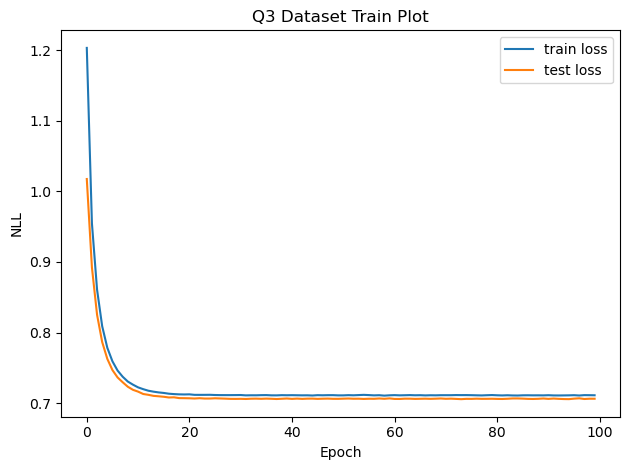

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


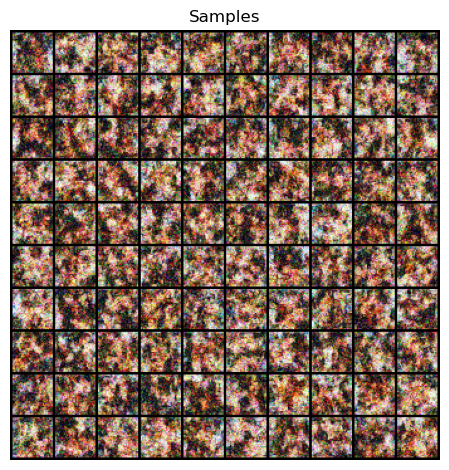

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


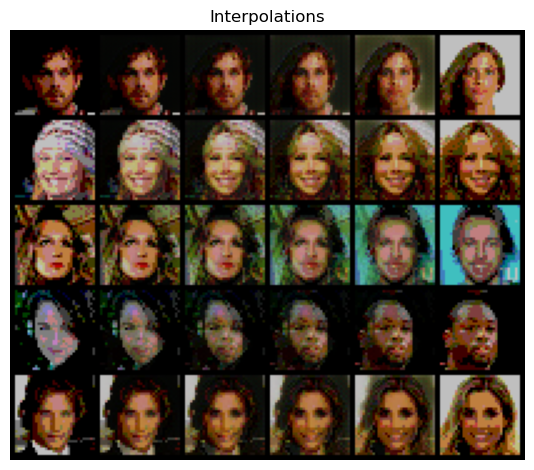

In [38]:
q3_save_results(q3_a, 'a')

## Part (b): Exploring bad masking schemes [10pt]

As shown in lecture, the choice of masking or partitioning scheme affects the quality of the final flow model. In this part, design a *bad* masking scheme and train a model with it on the same CelebA dataset. 

**Provide the same deliverables as part (a)**

In [39]:
class AffineHalfHalfTransform(nn.Module):
    def __init__(self, type):
        super(AffineHalfHalfTransform, self).__init__()
        self.mask = self.build_mask(type=type)
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.resnet = SimpleResnet()

    def build_mask(self, type):
        # if type == "top", the top half is 1s
        # if type == "bottom", the bottom half is 1s
        # if type == "left", left half is 1s
        # if type == right", right half is 1s
        assert type in {"top", "bottom", "left", "right"}
        if type == "bottom":
            mask = np.concatenate([np.zeros([1, 1, 16, 32]), np.ones([1, 1, 16, 32])], axis=2)
        elif type == "top":
            mask = np.concatenate([np.ones([1, 1, 16, 32]), np.zeros([1, 1, 16, 32])], axis=2)
        elif type == "left":
            mask = np.concatenate([np.ones([1, 1, 32, 16]), np.zeros([1, 1, 32, 16])], axis=3)
        elif type == "right":
            mask = np.concatenate([np.zeros([1, 1, 32, 16]), np.ones([1, 1, 32, 16])], axis=3)
        else:
            raise NotImplementedError
        return torch.tensor(mask.astype('float32')).to(device)

    def forward(self, x, reverse=False):
        # returns transform(x), log_det
        batch_size, n_channels, _, _ = x.shape
        mask = self.mask.repeat(batch_size, 1, 1, 1)
        x_ = x * mask

        log_s, t = self.resnet(x_).split(n_channels, dim=1)
        log_s = self.scale * torch.tanh(log_s) + self.scale_shift
        t = t * (1.0 - mask)
        log_s = log_s * (1.0 - mask)

        if reverse:  # inverting the transformation
            x = (x - t) * torch.exp(-log_s)
        else:
            x = x * torch.exp(log_s) + t
        return x, log_s


class BadRealNVP(nn.Module):
    def __init__(self):
        super(BadRealNVP, self).__init__()

        self.prior = torch.distributions.Normal(torch.tensor(0.).to(device), torch.tensor(1.).to(device))
        self.transforms = nn.ModuleList([
            AffineHalfHalfTransform("top"),
            ActNorm(3),
            AffineHalfHalfTransform("bottom"),
            ActNorm(3),
            AffineHalfHalfTransform("left"),
            ActNorm(3),
            AffineHalfHalfTransform("right"),
            ActNorm(3),
            AffineHalfHalfTransform("top"),
            ActNorm(3),
            AffineHalfHalfTransform("bottom"),
            ActNorm(3),
            AffineHalfHalfTransform("left"),
            ActNorm(3),
            AffineHalfHalfTransform("right")
        ])

    def g(self, z):
        # z -> x (inverse of f)
        x = z
        for op in reversed(self.transforms):
            x, _ = op.forward(x, reverse=True)
        return x

    def f(self, x):
        # maps x -> z, and returns the log determinant (not reduced)
        z, log_det = x, torch.zeros_like(x)
        for op in self.transforms:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        return z, log_det

    def log_prob(self, x):
        z, log_det = self.f(x)
        return torch.sum(log_det, [1, 2, 3]) + torch.sum(self.prior.log_prob(z), [1, 2, 3])

    def sample(self, num_samples):
        z = self.prior.sample([num_samples, 3, 32, 32])
        return self.g(z)

class BadSolver(Solver):
    def __init__(self, learning_rate=5e-4, n_epochs=128):
        super(BadSolver, self).__init__(learning_rate, n_epochs)

    def build(self):
        self.flow = BadRealNVP().to(device)
        self.optimizer = torch.optim.Adam(self.flow.parameters(), lr=self.learning_rate)

    def train(self):
        train_losses = []
        val_losses = []
        for epoch_i in range(self.n_epochs):
            epoch_i += 1

            self.flow.train()
            self.batch_loss_history = []

            for batch_i, image in enumerate(tqdm_notebook(
                    self.train_loader, desc='Batch', leave=False)):

                batch_i += 1
                # [batch_size, 3, 32, 32]
                image = Variable(image).to(device)
                logit_x, log_det = self.preprocess(image.float())
                log_prob = self.flow.log_prob(logit_x)
                log_prob += log_det

                batch_loss = -torch.mean(log_prob) / (3.0 * 32.0 * 32.0)

                self.optimizer.zero_grad()
                batch_loss.backward()
                self.optimizer.step()

                batch_loss = float(batch_loss.data)
                self.batch_loss_history.append(batch_loss)

            epoch_loss = np.mean(self.batch_loss_history)
            tqdm.write(f'Epoch {epoch_i} Loss: {epoch_loss:.2f}')

            if epoch_i % 10 == 0:
                self.save_model("badrealnvp{}.model".format(str(epoch_i)))
            train_losses.append(epoch_loss)
            val_losses.append(self.get_loss(self.val_loader))
            np.save("bad_train_losses.npy", np.array(train_losses))
            np.save("bad_val_losses.npy", np.array(val_losses))

        self.save_model("badrealnvp_final.model")
        np.save("bad_train_losses.npy", np.array(train_losses))
        np.save("bad_val_losses.npy", np.array(val_losses))
        return train_losses, val_losses

In [40]:
def q3_b(train_data, test_data):
    """
    train_data: A (n_train, H, W, 3) uint8 numpy array of quantized images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, 3) uint8 numpy array of binary images with values in {0, 1, 2, 3}

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 3) of samples with values in [0, 1]
    - a numpy array of size (30, H, W, 3) of interpolations with values in [0, 1].
    """

    """ YOUR CODE HERE """
    solver = BadSolver(n_epochs=1)
    solver.build()
    
    ckpt = torch.load("/root/dev/deepul/exp/badrealnvp100.model", map_location="cpu")
    solver.flow = ckpt
    
    train_losses = np.load('/root/dev/deepul/exp/bad_train_losses.npy')
    test_losses = np.load('/root/dev/deepul/exp/bad_val_losses.npy')
    samples = np.transpose(solver.sample(100), axes=[0, 2, 3, 1])
    interpolations = np.transpose(solver.interpolate(), axes=[0, 2, 3, 1])
    return train_losses, test_losses, samples, interpolations

Final Test Loss: 0.7824


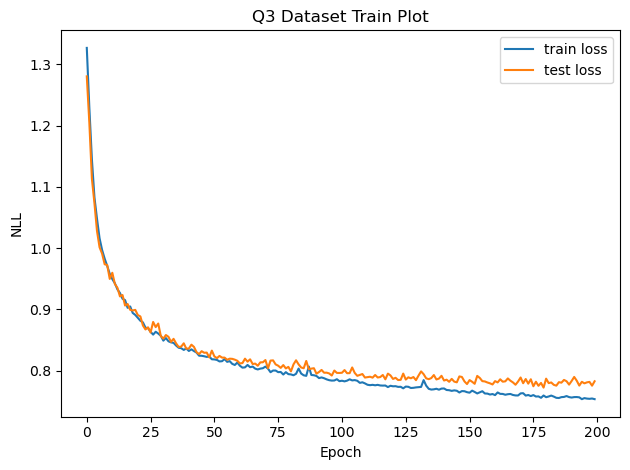

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


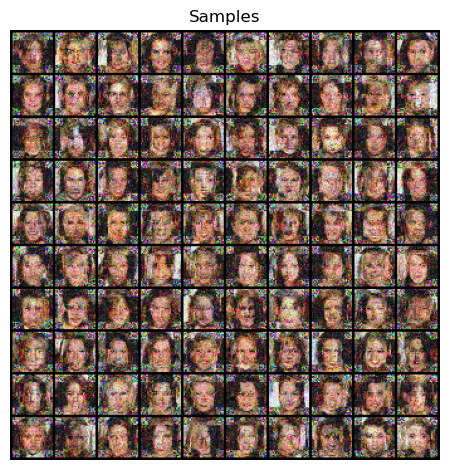

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


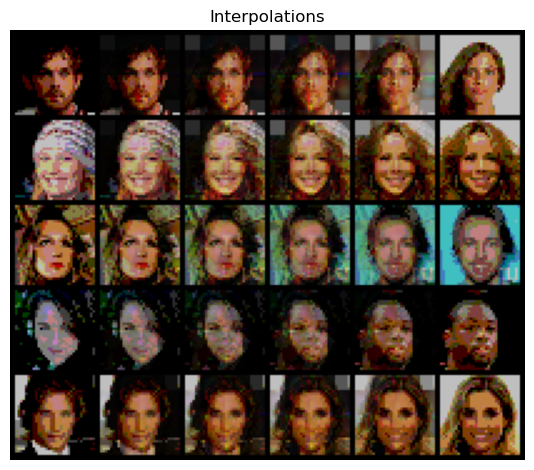

In [41]:
q3_save_results(q3_b, 'b')

# Question 4: Bonus Questions (Optional)

## Q4(a): Multiscale RealNVP [10pt]
Following the alternating checkerboard, channel squeeze, and channel partition scheme used in https://arxiv.org/abs/1605.08803, learn a multiscale RealNVP model on our CelebA dataset used in Question 3. We expect the same deliverables as in Question 3; additionally, make sure to include analysis on any difference in qualitative or quantitative differences you see in the results.

In [42]:
class WeightNormConv2d(nn.Module):
    def __init__(self, in_dim, out_dim, kernel_size, stride=1, padding=0,
                 bias=True):
        super(WeightNormConv2d, self).__init__()
        self.conv = nn.utils.weight_norm(
            nn.Conv2d(in_dim, out_dim, kernel_size,
                      stride=stride, padding=padding, bias=bias))

    def forward(self, x):
        return self.conv(x)

class ActNorm(nn.Module):
    def __init__(self, n_channels):
        super(ActNorm, self).__init__()
        self.log_scale = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.shift = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.n_channels = n_channels
        self.initialized = False

    def forward(self, x, reverse=False):
        if reverse:
            return (x - self.shift) * torch.exp(-self.log_scale), self.log_scale
        else:
            if not self.initialized:
                self.shift.data = -torch.mean(x, dim=[0, 2, 3], keepdim=True)
                self.log_scale.data = - torch.log(
                    torch.std(x.permute(1, 0, 2, 3).reshape(self.n_channels, -1), dim=1).reshape(1, self.n_channels, 1,
                                                                                                 1))
                self.initialized = True
                result = x * torch.exp(self.log_scale) + self.shift
            return x * torch.exp(self.log_scale) + self.shift, self.log_scale

class ResnetBlock(nn.Module):
    def __init__(self, dim):
        super(ResnetBlock, self).__init__()
        self.block = nn.Sequential(
            WeightNormConv2d(dim, dim, (1, 1), stride=1, padding=0),
            nn.ReLU(),
            WeightNormConv2d(dim, dim, (3, 3), stride=1, padding=1),
            nn.ReLU(),
            WeightNormConv2d(dim, dim, (1, 1), stride=1, padding=0))

    def forward(self, x):
        return x + self.block(x)

class SimpleResnet(nn.Module):
    def __init__(self, in_channels=3, out_channels=6, n_filters=128, n_blocks=8):
        super(SimpleResnet, self).__init__()
        layers = [WeightNormConv2d(in_channels, n_filters, (3, 3), stride=1, padding=1),
                  nn.ReLU()]
        for _ in range(n_blocks):
            layers.append(ResnetBlock(n_filters))
        layers.append(nn.ReLU())
        layers.append(WeightNormConv2d(n_filters, out_channels, (3, 3), stride=1, padding=1))
        self.resnet = nn.Sequential(*layers)

    def forward(self, x):
        return self.resnet(x)

class AffineCheckerboardTransform(nn.Module):
    def __init__(self, size, type=1.0):
        super(AffineCheckerboardTransform, self).__init__()
        self.mask = self.build_mask(size, type=type)
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        if size == 32:
            self.resnet = SimpleResnet()
        if size == 16:
            self.resnet = SimpleResnet(in_channels=6, out_channels=12)
        if size == 8:
            self.resnet = SimpleResnet(in_channels=12, out_channels=24)

    def build_mask(self, size, type=1.0):
        # if type == 1.0, the top left corner will be 1.0
        # if type == 0.0, the top left corner will be 0.0
        mask = np.arange(size).reshape(-1, 1) + np.arange(size)
        mask = np.mod(type + mask, 2)
        mask = mask.reshape(-1, 1, size, size)
        return torch.tensor(mask.astype('float32')).to(device)

    def forward(self, x, reverse=False):
        # returns transform(x), log_det
        batch_size, n_channels, _, _ = x.shape
        mask = self.mask.repeat(batch_size, 1, 1, 1)
        x_ = x * mask

        log_s, t = self.resnet(x_).split(n_channels, dim=1)
        log_s = self.scale * torch.tanh(log_s) + self.scale_shift
        t = t * (1.0 - mask)
        log_s = log_s * (1.0 - mask)

        if reverse:  # inverting the transformation
            x = (x - t) * torch.exp(-log_s)
        else:
            x = x * torch.exp(log_s) + t
        return x, log_s

class AffineChannelTransform(nn.Module):
    def __init__(self, chan, modify_top):
        super(AffineChannelTransform, self).__init__()
        self.modify_top = modify_top
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.resnet = SimpleResnet(in_channels=chan // 2, out_channels=chan)

    def forward(self, x, reverse=False):
        n_channels = x.shape[1]
        if self.modify_top:
            on, off = x.split(n_channels // 2, dim=1)
        else:
            off, on = x.split(n_channels // 2, dim=1)
        log_s, t = self.resnet(off).split(n_channels // 2, dim=1)
        log_s = self.scale * torch.tanh(log_s) + self.scale_shift

        if reverse:  # inverting the transformation
            on = (on - t) * torch.exp(-log_s)
        else:
            on = on * torch.exp(log_s) + t

        if self.modify_top:
            return torch.cat([on, off], dim=1), torch.cat([log_s, torch.zeros_like(log_s)], dim=1)
        else:
            return torch.cat([off, on], dim=1), torch.cat([torch.zeros_like(log_s), log_s], dim=1)

In [43]:
import numpy as np
import pickle

import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

from torch.autograd import Variable
from torchvision.utils import save_image, make_grid

device = "cuda"

class WeightNormConv2d(nn.Module):
    def __init__(self, in_dim, out_dim, kernel_size, stride=1, padding=0,
                 bias=True):
        super(WeightNormConv2d, self).__init__()
        self.conv = nn.utils.weight_norm(
            nn.Conv2d(in_dim, out_dim, kernel_size,
                      stride=stride, padding=padding, bias=bias))

    def forward(self, x):
        return self.conv(x)

class ActNorm(nn.Module):
    def __init__(self, n_channels):
        super(ActNorm, self).__init__()
        self.log_scale = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.shift = nn.Parameter(torch.zeros(1, n_channels, 1, 1), requires_grad=True)
        self.n_channels = n_channels
        self.initialized = False

    def forward(self, x, reverse=False):
        if reverse:
            return (x - self.shift) * torch.exp(-self.log_scale), self.log_scale
        else:
            if not self.initialized:
                self.shift.data = -torch.mean(x, dim=[0, 2, 3], keepdim=True)
                self.log_scale.data = - torch.log(
                    torch.std(x.permute(1, 0, 2, 3).reshape(self.n_channels, -1), dim=1).reshape(1, self.n_channels, 1,
                                                                                                 1))
                self.initialized = True
                result = x * torch.exp(self.log_scale) + self.shift
            return x * torch.exp(self.log_scale) + self.shift, self.log_scale

class ResnetBlock(nn.Module):
    def __init__(self, dim):
        super(ResnetBlock, self).__init__()
        self.block = nn.Sequential(
            WeightNormConv2d(dim, dim, (1, 1), stride=1, padding=0),
            nn.ReLU(),
            WeightNormConv2d(dim, dim, (3, 3), stride=1, padding=1),
            nn.ReLU(),
            WeightNormConv2d(dim, dim, (1, 1), stride=1, padding=0))

    def forward(self, x):
        return x + self.block(x)

class SimpleResnet(nn.Module):
    def __init__(self, in_channels=3, out_channels=6, n_filters=128, n_blocks=8):
        super(SimpleResnet, self).__init__()
        layers = [WeightNormConv2d(in_channels, n_filters, (3, 3), stride=1, padding=1),
                  nn.ReLU()]
        for _ in range(n_blocks):
            layers.append(ResnetBlock(n_filters))
        layers.append(nn.ReLU())
        layers.append(WeightNormConv2d(n_filters, out_channels, (3, 3), stride=1, padding=1))
        self.resnet = nn.Sequential(*layers)

    def forward(self, x):
        return self.resnet(x)

class AffineCheckerboardTransform(nn.Module):
    def __init__(self, size, type=1.0):
        super(AffineCheckerboardTransform, self).__init__()
        self.mask = self.build_mask(size, type=type)
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        if size == 32:
            self.resnet = SimpleResnet()
        if size == 16:
            self.resnet = SimpleResnet(in_channels=6, out_channels=12)
        if size == 8:
            self.resnet = SimpleResnet(in_channels=12, out_channels=24)

    def build_mask(self, size, type=1.0):
        # if type == 1.0, the top left corner will be 1.0
        # if type == 0.0, the top left corner will be 0.0
        mask = np.arange(size).reshape(-1, 1) + np.arange(size)
        mask = np.mod(type + mask, 2)
        mask = mask.reshape(-1, 1, size, size)
        return torch.tensor(mask.astype('float32')).to(device)

    def forward(self, x, reverse=False):
        # returns transform(x), log_det
        batch_size, n_channels, _, _ = x.shape
        mask = self.mask.repeat(batch_size, 1, 1, 1)
        x_ = x * mask

        log_s, t = self.resnet(x_).split(n_channels, dim=1)
        log_s = self.scale * torch.tanh(log_s) + self.scale_shift
        t = t * (1.0 - mask)
        log_s = log_s * (1.0 - mask)

        if reverse:  # inverting the transformation
            x = (x - t) * torch.exp(-log_s)
        else:
            x = x * torch.exp(log_s) + t
        return x, log_s

class AffineChannelTransform(nn.Module):
    def __init__(self, chan, modify_top):
        super(AffineChannelTransform, self).__init__()
        self.modify_top = modify_top
        self.scale = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.scale_shift = nn.Parameter(torch.zeros(1), requires_grad=True)
        self.resnet = SimpleResnet(in_channels=chan // 2, out_channels=chan)

    def forward(self, x, reverse=False):
        n_channels = x.shape[1]
        if self.modify_top:
            on, off = x.split(n_channels // 2, dim=1)
        else:
            off, on = x.split(n_channels // 2, dim=1)
        log_s, t = self.resnet(off).split(n_channels // 2, dim=1)
        log_s = self.scale * torch.tanh(log_s) + self.scale_shift

        if reverse:  # inverting the transformation
            on = (on - t) * torch.exp(-log_s)
        else:
            on = on * torch.exp(log_s) + t

        if self.modify_top:
            return torch.cat([on, off], dim=1), torch.cat([log_s, torch.zeros_like(log_s)], dim=1)
        else:
            return torch.cat([off, on], dim=1), torch.cat([torch.zeros_like(log_s), log_s], dim=1)


class RealNVP(nn.Module):
    def __init__(self, chan=3, size=32):
        super(RealNVP, self).__init__()

        self.prior = torch.distributions.Normal(torch.tensor(0.).to(device), torch.tensor(1.).to(device))
        # self.prior = torch.distributions.Normal(torch.tensor(0.).to(device), torch.tensor(1.).to(device))
        self.checker_transforms1 = nn.ModuleList([
            AffineCheckerboardTransform(size, 1.0),
            ActNorm(chan),
            AffineCheckerboardTransform(size, 0.0),
            ActNorm(chan),
            AffineCheckerboardTransform(size, 1.0),
            ActNorm(chan),
            AffineCheckerboardTransform(size, 0.0)
        ])

        self.channel_transforms = nn.ModuleList([
            AffineChannelTransform(chan*4,True),
            ActNorm(chan*4),
            AffineChannelTransform(chan*4,False),
            ActNorm(chan*4),
            AffineChannelTransform(chan*4, True),
        ])

        self.checker_transforms2 = nn.ModuleList([
            AffineCheckerboardTransform(size, 1.0),
            ActNorm(chan),
            AffineCheckerboardTransform(size, 0.0),
            ActNorm(chan),
            AffineCheckerboardTransform(size, 1.0)
        ])

    def squeeze(self, x):
        # C x H x W -> 4C x H/2 x W/2
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C, H // 2, 2, W // 2, 2)
        x = x.permute(0, 1, 3, 5, 2, 4)
        x = x.reshape(B, C * 4, H // 2, W // 2)
        return x

    def undo_squeeze(self, x):
        #  4C x H/2 x W/2  ->  C x H x W
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C // 4, 2, 2, H, W)
        x = x.permute(0, 1, 4, 2, 5, 3)
        x = x.reshape(B, C // 4, H * 2, W * 2)
        return x

    def g(self, z):
        # z -> x (inverse of f)
        x = z
        for op in reversed(self.checker_transforms2):
            x, _ = op.forward(x, reverse=True)
        x = self.squeeze(x)
        for op in reversed(self.channel_transforms):
            x, _ = op.forward(x, reverse=True)
        x = self.undo_squeeze(x)
        for op in reversed(self.checker_transforms1):
            x, _ = op.forward(x, reverse=True)
        return x

    def f(self, x):
        # maps x -> z, and returns the log determinant (not reduced)
        z, log_det = x, torch.zeros_like(x)
        for op in self.checker_transforms1:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        z, log_det = self.squeeze(z), self.squeeze(log_det)
        for op in self.channel_transforms:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        z, log_det = self.undo_squeeze(z), self.undo_squeeze(log_det)
        for op in self.checker_transforms2:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        return z, log_det

    def log_prob(self, x):
        z, log_det = self.f(x)
        return torch.sum(log_det, [1, 2, 3]) + torch.sum(self.prior.log_prob(z), [1, 2, 3])

    def sample(self, num_samples):
        z = self.prior.sample([num_samples, 3, 32, 32])
        return self.g(z)


class MultiScaleRealNVP(nn.Module):
    def __init__(self):
        super(MultiScaleRealNVP, self).__init__()
        self.prior = torch.distributions.Normal(torch.tensor(0.).to(device), torch.tensor(1.).to(device))
        self.flow1 = RealNVP(3, 32).to(device)
        self.flow2 = RealNVP(6, 16).to(device)
        self.flow3 = RealNVP(12, 8).to(device)

        self.order_matrix1 = self.order_matrix(3)
        self.order_matrix2 = self.order_matrix(6)
        self.order_matrix3 = self.order_matrix(12)

    def f(self, x):
        x, log_det1 = self.flow1.f(x)
        x, x_off_1 = self.factor_out(x, self.order_matrix1)
        log_det1, log_det_off_1 = self.factor_out(log_det1, self.order_matrix1)

        x, log_det2 = self.flow2.f(x)
        log_det2 = log_det2 + log_det1
        x, x_off_2 = self.factor_out(x, self.order_matrix2)
        log_det2, log_det_off_2 = self.factor_out(log_det2, self.order_matrix2)

        x, log_det3 = self.flow3.f(x)
        log_det3 = log_det3+log_det2

        x = self.restore(x, x_off_2, self.order_matrix2)
        log_det2 = self.restore(log_det3, log_det_off_2, self.order_matrix2)
        x = self.restore(x, x_off_1, self.order_matrix1)
        log_det1 = self.restore(log_det2, log_det_off_1, self.order_matrix1)

        return x, log_det1
    def g(self, x):
        x, x_off_1 = self.factor_out(x, self.order_matrix1)
        x, x_off_2 = self.factor_out(x, self.order_matrix2)

        x = self.flow3.g(x)
        x = self.restore(x, x_off_2, self.order_matrix2)

        x = self.flow2.g(x)
        x = self.restore(x, x_off_1, self.order_matrix1)

        x = self.flow1.g(x)
        return x

    def squeeze(self, x):
        # C x H x W -> 4C x H/2 x W/2
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C, H // 2, 2, W // 2, 2)
        x = x.permute(0, 1, 3, 5, 2, 4)
        x = x.reshape(B, C * 4, H // 2, W // 2)
        return x

    def undo_squeeze(self, x):
        #  4C x H/2 x W/2  ->  C x H x W
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C // 4, 2, 2, H, W)
        x = x.permute(0, 1, 4, 2, 5, 3)
        x = x.reshape(B, C // 4, H * 2, W * 2)
        return x
    
    def order_matrix(self, channel):
        """Constructs a matrix that defines the ordering of variables
        when downscaling/upscaling is performed.
        Args:
          channel: number of features.
        Returns:
          a kernel for rearrange the variables.
        """
        weights = np.zeros((channel*4, channel, 2, 2))
        ordering = np.array([[[[1., 0.],
                               [0., 0.]]],
                             [[[0., 0.],
                               [0., 1.]]],
                             [[[0., 1.],
                               [0., 0.]]],
                             [[[0., 0.],
                               [1., 0.]]]])
        for i in range(channel):
            s1 = slice(i, i+1)
            s2 = slice(4*i, 4*(i+1))
            weights[s2, s1, :, :] = ordering
        shuffle = np.array([4*i for i in range(channel)]
                         + [4*i+1 for i in range(channel)]
                         + [4*i+2 for i in range(channel)]
                         + [4*i+3 for i in range(channel)])
        weights = weights[shuffle, :, :, :].astype('float32')
        return torch.tensor(weights).to(device)
    
    def factor_out(self, x, order_matrix):
        """Downscales and factors out the bottom half of the tensor.
        (See Fig 4(b) in the real NVP paper.)
        Args:
            x: input tensor (B x C x H x W).
            order_matrix: a kernel that defines the ordering of variables.
        Returns:
            the top half for further transformation (B x 2C x H/2 x W/2)
            and the Gaussianized bottom half (B x 2C x H/2 x W/2).
        """
        x = F.conv2d(x, order_matrix, stride=2, padding=0)
        [_, C, _, _] = list(x.size())
        (on, off) = x.split(C//2, dim=1)
        return on, off
    
    def restore(self, on, off, order_matrix):
        """Merges variables and restores their ordering.
        (See Fig 4(b) in the real NVP paper.)
        Args:
            on: the active (transformed) variables (B x C x H x W).
            off: the inactive variables (B x C x H x W).
            order_matrix: a kernel that defines the ordering of variables.
        Returns:
            combined variables (B x 2C x H x W).
        """
        # print(on.shape, off.shape)
        x = torch.cat((on, off), dim=1)
        return F.conv_transpose2d(x, order_matrix, stride=2, padding=0)

    def log_prob(self, x):
        z, log_det = self.f(x)
        return torch.sum(log_det, [1, 2, 3]) + torch.sum(self.prior.log_prob(z), [1, 2, 3])

    def sample(self, num_samples):
        z = self.prior.sample([num_samples, 3, 32, 32])
        return self.g(z)


In [44]:
import argparse

parser = argparse.ArgumentParser()

parser.add_argument("--output_dir", type=str, default="/root/dev/deepul/exp")
parser.add_argument("--data_dir", type=str, default="/root/dev/deepul/homeworks/hw2/data")
parser.add_argument("--num_epoch", type=int, default=100)
parser.add_argument("--batch_size", type=int, default=128)
parser.add_argument("--save_epoch_step", type=int, default=50)

args = parser.parse_args([])

In [45]:
class Solver(object):
    def __init__(self, learning_rate=5e-4, n_epochs=128, local_rank=None, args=args):
        self.log_interval = 100
        self.n_epochs = n_epochs
        self.learning_rate = learning_rate
        self.output_dir = args.output_dir
        self.batch_size = args.batch_size
        self.save_epoch_step = args.save_epoch_step
        
        self.train_loader, self.val_loader = self.create_loaders()
        self.n_batches_in_epoch = len(self.train_loader)
        
        # for DDP
        self.local_rank = local_rank

    def build(self):
        self.flow = RealNVP().cuda()   
        self.flow = DDP(module=self.flow, device_ids=[self.local_rank]) # wrapping for DDP
        
        self.optimizer = torch.optim.Adam(self.flow.parameters(), lr=self.learning_rate)
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=self.optimizer, lr_lambda=lambda epoch:0.99**epoch)

    def create_loaders(self):
        train, test = get_q3_data()
        train = np.transpose(train, axes=[0, 3, 1, 2])  # NCHW 20000 x 3 x 32 x 32
        test = np.transpose(test, axes=[0, 3, 1, 2])  # NCHW 6838 x 3 x 32 x 32
        
        # Sampler for DDP
        train_sampler = DistributedSampler(dataset=train) #, shuffle=True)
        test_sampler = DistributedSampler(dataset=test) #, shuffle=False)

        train_loader = DataLoader(train, batch_size=self.batch_size, sampler=train_sampler, pin_memory=False)
        test_loader = DataLoader(test, batch_size=self.batch_size, sampler=test_sampler, pin_memory=False)
        return train_loader, test_loader

    def preprocess(self, x, reverse=False, dequantize=True):
        if reverse:  # doesn't map back to [0, 4]
            x = 1.0 / (1 + torch.exp(-x))
            x -= 0.05
            x /= 0.9
            return x
        else:
            # dequantization
            if dequantize:
                x += torch.distributions.Uniform(0.0, 1.0).sample(x.shape).cuda()
            x /= 4.0

            # logit operation
            x *= 0.9
            x += 0.05
            logit = torch.log(x) - torch.log(1.0 - x)
            log_det = torch.nn.functional.softplus(logit) + torch.nn.functional.softplus(-logit) \
                      + torch.log(torch.tensor(0.9)) - torch.log(torch.tensor(4.0))
            return logit, torch.sum(log_det, dim=(1, 2, 3))

    def train(self):
        train_losses = []
        val_losses = []
        for epoch_i in range(self.n_epochs):
            epoch_i += 1

            self.flow.train()
            self.batch_loss_history = []

            for batch_i, image in enumerate(tqdm(
                    self.train_loader, desc='Batch', leave=False)):

                batch_i += 1
                # [batch_size, 3, 32, 32]
                image = Variable(image).cuda()
                logit_x, log_det = self.preprocess(image.float())
                log_prob = self.flow.module.log_prob(logit_x)
                log_prob += log_det

                batch_loss = -torch.mean(log_prob) / (3.0 * 32.0 * 32.0)

                self.optimizer.zero_grad()
                batch_loss.backward()
                self.optimizer.step()
                self.scheduler.step()

                batch_loss = float(batch_loss.data)
                self.batch_loss_history.append(batch_loss)

            epoch_loss = np.mean(self.batch_loss_history)
            tqdm.write(f'Epoch {epoch_i} Loss: {epoch_loss:.2f}')

            if epoch_i % self.save_epoch_step == 0:
                self.save_model_module(os.path.join(self.output_dir, "realnvp{}.model".format(str(epoch_i))))
            train_losses.append(epoch_loss)
            val_losses.append(self.get_loss(self.val_loader))
            np.save(os.path.join(self.output_dir, "train_losses.npy"), np.array(train_losses))
            np.save(os.path.join(self.output_dir, "val_losses.npy"), np.array(val_losses))

        self.save_model_module(os.path.join(self.output_dir, "q3_a_ckpt_{}_model_module.pt".format(self.n_epochs)))
        self.save_model_state_dict(os.path.join(self.output_dir, "q3_a_ckpt_{}_model_state_dict.pt".format(self.n_epochs)))
        self.save_model_module_state_dict(os.path.join(self.output_dir, "q3_a_ckpt_{}_model_module_state_dict.pt".format(self.n_epochs)))
        return train_losses, val_losses

    def save_model_module(self, filename):
        if self.local_rank == 0:
            torch.save(self.flow.module, filename)

class MultiSolver(Solver):
    def __init__(self, learning_rate=5e-4, n_epochs=128, local_rank=None, args=None):
        super().__init__(learning_rate, n_epochs, local_rank, args)

    def build(self):
        self.flow = MultiScaleRealNVP().cuda()
        self.flow = DDP(module=self.flow, device_ids=[self.local_rank])
        self.optimizer = torch.optim.Adam(self.flow.parameters(), lr=self.learning_rate)

    def train(self):
        train_losses = []
        val_losses = []
        for epoch_i in range(self.n_epochs):
            epoch_i += 1

            self.flow.train()
            self.batch_loss_history = []

            for batch_i, image in enumerate(tqdm(
                    self.train_loader, desc='Batch', leave=False)):

                batch_i += 1
                # [batch_size, 3, 32, 32]
                image = Variable(image).cuda()
                logit_x, log_det = self.preprocess(image.float())
                log_prob = self.flow.module.log_prob(logit_x)
                log_prob += log_det

                batch_loss = -torch.mean(log_prob) / (3.0 * 32.0 * 32.0)

                self.optimizer.zero_grad()
                batch_loss.backward()
                self.optimizer.step()

                batch_loss = float(batch_loss.data)
                self.batch_loss_history.append(batch_loss)

            epoch_loss = np.mean(self.batch_loss_history)
            tqdm.write(f'Epoch {epoch_i} Loss: {epoch_loss:.2f}')

            train_losses.append(epoch_loss)
            val_losses.append(self.get_loss(self.val_loader))

            if epoch_i % self.save_epoch_step == 0:
                self.save_model_module(os.path.join(self.output_dir, "q4_a_ckpt_{}_model_module.pt".format(epoch_i)))
                np.save(os.path.join(self.output_dir, "multi_train_losses_{}.npy".format(epoch_i)), np.array(train_losses))
                np.save(os.path.join(self.output_dir, "multi_val_losses_{}.npy".format(epoch_i)), np.array(val_losses))

        return train_losses, val_losses

    def get_loss(self, loader):
        """Compute error on provided data set"""
        errors = []
        # cuda.synchronize()
        start = time.time()

        self.flow.eval()

        for image in loader:
            with torch.no_grad():
                image = Variable(image).to(device)
                logit_x, log_det = self.preprocess(image.float())
                log_prob = self.flow.module.log_prob(logit_x)
                log_prob += log_det

                loss = -torch.mean(log_prob) / (3.0 * 32.0 * 32.0)
                error = float(loss.data)
                errors.append(error)

        # cuda.synchronize()
        time_test = time.time() - start
        log_string = f'Calc done! | It took {time_test:.1f}s | '
        log_string += f'Loss: {np.mean(errors):.2f}'
        tqdm.write(log_string)
        return np.mean(errors)

    def sample(self, num_samples):
        with torch.no_grad():
            raw_samples = self.flow.sample(num_samples).cpu()
            samples = self.preprocess(raw_samples, reverse=True)
            return samples.cpu().numpy()

    def interpolate(self):
        self.flow.eval()
        good = [5, 13, 16, 19, 22]
        indices = []
        for index in good:
            indices.append(index*2)
            indices.append(index*2+1)
        with torch.no_grad():
            actual_images = next(iter(self.val_loader))[indices].to('cpu')
            assert actual_images.shape[0] % 2 == 0
            logit_actual_images, _ = self.preprocess(actual_images.float(), dequantize=False)
            latent_images, _ = self.flow.f(logit_actual_images)
            latents = []
            for i in range(0, actual_images.shape[0], 2):
                a = latent_images[i:i+1]
                b = latent_images[i + 1:i+2]
                diff = (b - a)/5.0
                latents.append(a)
                for j in range(1, 5):
                    latents.append(a + diff * float(j))
                latents.append(b)
            latents = torch.cat(latents, dim=0)
            logit_results = self.flow.g(latents)
            results = self.preprocess(logit_results, reverse=True)
            return results.cpu().numpy()

    def save_model(self, filename):
        torch.save(self.flow.module, filename)

    def load_model(self, filename):
        self.flow = torch.load(filename, map_location="cuda")

In [46]:
def q4_a(train_data, test_data):
    """
    train_data: A (n_train, H, W, 3) uint8 numpy array of quantized images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, 3) uint8 numpy array of binary images with values in {0, 1, 2, 3}

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 3) of samples with values in [0, 1]
    - a numpy array of size (30, H, W, 3) of interpolations with values in [0, 1].
    """

    """ YOUR CODE HERE """
    solver = MultiSolver(n_epochs=1, args=args)
    solver.build()
    
    ckpt = torch.load("/root/dev/deepul/exp/q4_a_ckpt_100_model_module.pt", map_location="cpu")
    solver.flow = ckpt
    
    train_losses = np.load('/root/dev/deepul/exp/multi_train_losses_100.npy')
    test_losses = np.load('/root/dev/deepul/exp/multi_val_losses_100.npy')
    samples = np.transpose(solver.sample(100), axes=[0, 2, 3, 1])
    interpolations = np.transpose(solver.interpolate(), axes=[0, 2, 3, 1])
    return train_losses, test_losses, samples, interpolations

Final Test Loss: 0.4968


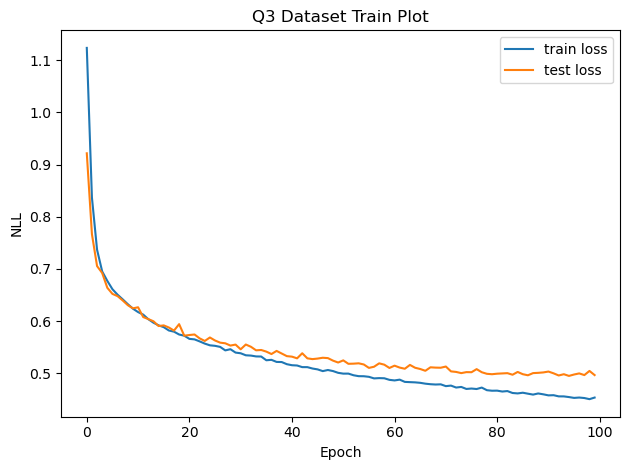

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


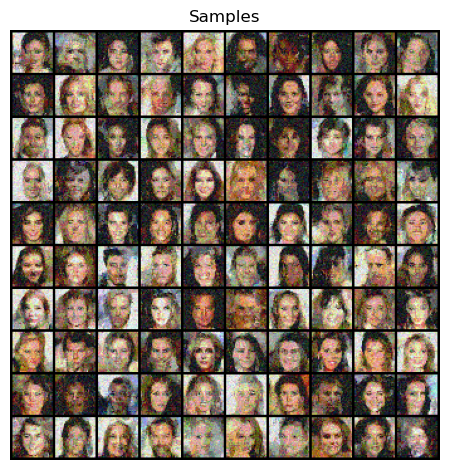

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


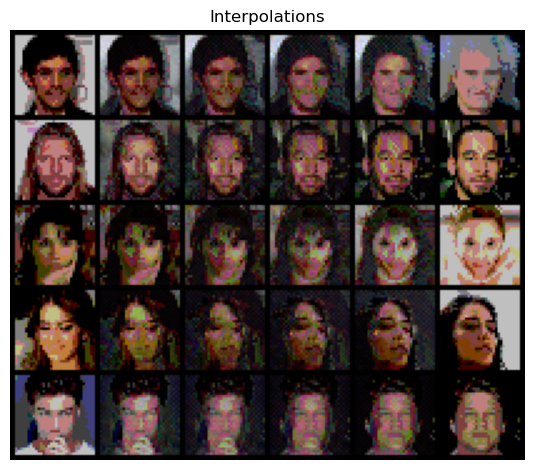

In [47]:
q3_save_results(q4_a, 'bonus_a')

## Q4(b): Glow [5pt]
The Glow paper introduces the invertible 1x1 convolution as a replacement for the permutation scheme that follows the channel squeezing step. Use this in your model from Question 3, and report the same deliverables. Make sure to include analysis on any difference in qualitative or quantitative differences you see in the results.

In [48]:
# custom modules
from models import thops
from models import modules

def f(in_channels, out_channels, hidden_channels):
    return nn.Sequential(
        modules.Conv2d(in_channels, hidden_channels), nn.ReLU(inplace=False),
        modules.Conv2d(hidden_channels, hidden_channels, kernel_size=[1, 1]), nn.ReLU(inplace=False),
        modules.Conv2dZeros(hidden_channels, out_channels))


class FlowStep(nn.Module):
    FlowCoupling = ["additive", "affine"]
    FlowPermutation = {
        "reverse": lambda obj, z, logdet, rev: (obj.reverse(z, rev), logdet),
        "shuffle": lambda obj, z, logdet, rev: (obj.shuffle(z, rev), logdet),
        "invconv": lambda obj, z, logdet, rev: obj.invconv(z, logdet, rev)
    }

    def __init__(self, in_channels, hidden_channels,
                 actnorm_scale=1.0,
                 flow_permutation="invconv",
                 flow_coupling="additive",
                 LU_decomposed=False):
        # check configures
        assert flow_coupling in FlowStep.FlowCoupling,\
            "flow_coupling should be in `{}`".format(FlowStep.FlowCoupling)
        assert flow_permutation in FlowStep.FlowPermutation,\
            "float_permutation should be in `{}`".format(
                FlowStep.FlowPermutation.keys())
        super().__init__()
        self.flow_permutation = flow_permutation
        self.flow_coupling = flow_coupling
        # 1. actnorm
        self.actnorm = modules.ActNorm2d(in_channels, actnorm_scale)
        # 2. permute
        if flow_permutation == "invconv":
            self.invconv = modules.InvertibleConv1x1(
                in_channels, LU_decomposed=LU_decomposed)
        elif flow_permutation == "shuffle":
            self.shuffle = modules.Permute2d(in_channels, shuffle=True)
        else:
            self.reverse = modules.Permute2d(in_channels, shuffle=False)
        # 3. coupling
        if flow_coupling == "additive":
            self.f = f(in_channels // 2, in_channels // 2, hidden_channels)
        elif flow_coupling == "affine":
            self.f = f(in_channels // 2, in_channels, hidden_channels)

    def forward(self, input, logdet=None, reverse=False):
        if not reverse:
            return self.normal_flow(input, logdet)
        else:
            return self.reverse_flow(input, logdet)

    def normal_flow(self, input, logdet):
        assert input.size(1) % 2 == 0
        # 1. actnorm
        z, logdet = self.actnorm(input, logdet=logdet, reverse=False)
        # 2. permute
        z, logdet = FlowStep.FlowPermutation[self.flow_permutation](
            self, z, logdet, False)
        # 3. coupling
        z1, z2 = thops.split_feature(z, "split")
        if self.flow_coupling == "additive":
            z2 = z2 + self.f(z1)
        elif self.flow_coupling == "affine":
            h = self.f(z1)
            shift, scale = thops.split_feature(h, "cross")
            scale = torch.sigmoid(scale + 2.)
            z2 = z2 + shift
            z2 = z2 * scale
            logdet = thops.sum(torch.log(scale), dim=[1, 2, 3]) + logdet
        z = thops.cat_feature(z1, z2)
        return z, logdet

    def reverse_flow(self, input, logdet):
        assert input.size(1) % 2 == 0
        # 1.coupling
        z1, z2 = thops.split_feature(input, "split")
        if self.flow_coupling == "additive":
            z2 = z2 - self.f(z1)
        elif self.flow_coupling == "affine":
            h = self.f(z1)
            shift, scale = thops.split_feature(h, "cross")
            scale = torch.sigmoid(scale + 2.)
            z2 = z2 / scale
            z2 = z2 - shift
            logdet = -thops.sum(torch.log(scale), dim=[1, 2, 3]) + logdet
        z = thops.cat_feature(z1, z2)
        # 2. permute
        z, logdet = FlowStep.FlowPermutation[self.flow_permutation](
            self, z, logdet, True)
        # 3. actnorm
        z, logdet = self.actnorm(z, logdet=logdet, reverse=True)
        return z, logdet


class FlowNet(nn.Module):
    def __init__(self, image_shape, hidden_channels, K, L,
                 actnorm_scale=1.0,
                 flow_permutation="invconv",
                 flow_coupling="additive",
                 LU_decomposed=False):
        """
                             K                                      K
        --> [Squeeze] -> [FlowStep] -> [Split] -> [Squeeze] -> [FlowStep]
               ^                           v
               |          (L - 1)          |
               + --------------------------+
        """
        super().__init__()
        self.layers = nn.ModuleList()
        self.output_shapes = []
        self.K = K
        self.L = L
        H, W, C = image_shape
        assert C == 1 or C == 3, ("image_shape should be HWC, like (64, 64, 3)"
                                  "C == 1 or C == 3")
        for i in range(L):
            # 1. Squeeze
            C, H, W = C * 4, H // 2, W // 2
            self.layers.append(modules.SqueezeLayer(factor=2))
            self.output_shapes.append([-1, C, H, W])
            # 2. K FlowStep
            for _ in range(K):
                self.layers.append(
                    FlowStep(in_channels=C,
                             hidden_channels=hidden_channels,
                             actnorm_scale=actnorm_scale,
                             flow_permutation=flow_permutation,
                             flow_coupling=flow_coupling,
                             LU_decomposed=LU_decomposed))
                self.output_shapes.append(
                    [-1, C, H, W])
            # 3. Split2d
            if i < L - 1:
                self.layers.append(modules.Split2d(num_channels=C))
                self.output_shapes.append([-1, C // 2, H, W])
                C = C // 2

    def forward(self, input, logdet=0., reverse=False, eps_std=None):
        if not reverse:
            return self.encode(input, logdet)
        else:
            return self.decode(input, eps_std)

    def encode(self, z, logdet=0.0):
        for layer, shape in zip(self.layers, self.output_shapes):
            z, logdet = layer(z, logdet, reverse=False)
        return z, logdet

    def decode(self, z, eps_std=None):
        for layer in reversed(self.layers):
            if isinstance(layer, modules.Split2d):
                z, logdet = layer(z, logdet=0, reverse=True, eps_std=eps_std)
            else:
                z, logdet = layer(z, logdet=0, reverse=True)
        return z


class Glow(RealNVP):
    BCE = nn.BCEWithLogitsLoss()
    CE = nn.CrossEntropyLoss()

    def __init__(self):
        super().__init__()
        self.batch_size = 128
        self.flow = FlowNet(image_shape=[32, 32, 3],
                            hidden_channels=512,
                            K=32,
                            L=3,
                            actnorm_scale=1.0,
                            flow_permutation="invconv",
                            flow_coupling="affine",
                            LU_decomposed=False)
        self.y_classes = 40
        self.register_parameter(
            "prior_h",
            nn.Parameter(torch.zeros([self.batch_size,
                                      self.flow.output_shapes[-1][1] * 2,
                                      self.flow.output_shapes[-1][2],
                                      self.flow.output_shapes[-1][3]])))
        self.pri = torch.distributions.Normal(torch.tensor(0.).cuda(), torch.tensor(1.).cuda())

    def prior(self, y_onehot=None):
        B, C = self.prior_h.size(0), self.prior_h.size(1)
        h = self.prior_h.detach().clone()
        assert torch.sum(h) == 0.0
        return thops.split_feature(h, "split")

    def forward(self, x=None, y_onehot=None, z=None,
                eps_std=None, reverse=False):
        if not reverse:
            return self.normal_flow(x, y_onehot)
        else:
            return self.reverse_flow(z, y_onehot, eps_std)

    def normal_flow(self, x, y_onehot):
        pixels = thops.pixels(x)
        z = x + torch.normal(mean=torch.zeros_like(x),
                             std=torch.ones_like(x) * (1. / 256.))
        logdet = torch.zeros_like(x[:, 0, 0, 0])
        logdet += float(-np.log(256.) * pixels)
        # encode
        z, objective = self.flow(z, logdet=logdet, reverse=False)
        # prior
        mean, logs = self.prior(y_onehot)
        objective += modules.GaussianDiag.logp(mean, logs, z)

        y_logits = None

        # return
        nll = (-objective) / float(np.log(2.) * pixels)
        return z, nll, y_logits

    def reverse_flow(self, z, y_onehot, eps_std):
        with torch.no_grad():
            mean, logs = self.prior(y_onehot)
            if z is None:
                z = modules.GaussianDiag.sample(mean, logs, eps_std)
            x = self.flow(z, eps_std=eps_std, reverse=True)
        return x

    def set_actnorm_init(self, inited=True):
        for name, m in self.named_modules():
            if (m.__class__.__name__.find("ActNorm") >= 0):
                m.inited = inited

    def generate_z(self, img):
        self.eval()
        B = self.batch_size
        x = img.unsqueeze(0).repeat(B, 1, 1, 1).cuda()
        z,_, _ = self(x)
        self.train()
        return z[0].detach().cpu().numpy()

    def generate_attr_deltaz(self, dataset):
        assert "y_onehot" in dataset[0]
        self.eval()
        with torch.no_grad():
            B = self.batch_size
            N = len(dataset)
            attrs_pos_z = [[0, 0] for _ in range(self.y_classes)]
            attrs_neg_z = [[0, 0] for _ in range(self.y_classes)]
            for i in tqdm(range(0, N, B)):
                j = min([i + B, N])
                # generate z for data from i to j
                xs = [dataset[k]["x"] for k in range(i, j)]
                while len(xs) < B:
                    xs.append(dataset[0]["x"])
                xs = torch.stack(xs).cuda()
                zs, _, _ = self(xs)
                for k in range(i, j):
                    z = zs[k - i].detach().cpu().numpy()
                    # append to different attrs
                    y = dataset[k]["y_onehot"]
                    for ai in range(self.y_classes):
                        if y[ai] > 0:
                            attrs_pos_z[ai][0] += z
                            attrs_pos_z[ai][1] += 1
                        else:
                            attrs_neg_z[ai][0] += z
                            attrs_neg_z[ai][1] += 1
                # break
            deltaz = []
            for ai in range(self.y_classes):
                if attrs_pos_z[ai][1] == 0:
                    attrs_pos_z[ai][1] = 1
                if attrs_neg_z[ai][1] == 0:
                    attrs_neg_z[ai][1] = 1
                z_pos = attrs_pos_z[ai][0] / float(attrs_pos_z[ai][1])
                z_neg = attrs_neg_z[ai][0] / float(attrs_neg_z[ai][1])
                deltaz.append(z_pos - z_neg)
        self.train()
        return deltaz

    @staticmethod
    def loss_generative(nll):
        # Generative loss
        return torch.mean(nll)

    @staticmethod
    def loss_multi_classes(y_logits, y_onehot):
        if y_logits is None:
            return 0
        else:
            return Glow.BCE(y_logits, y_onehot.float())

    @staticmethod
    def loss_class(y_logits, y):
        if y_logits is None:
            return 0
        else:
            return Glow.CE(y_logits, y.long())

    def squeeze(self, x):
        # C x H x W -> 4C x H/2 x W/2
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C, H // 2, 2, W // 2, 2)
        x = x.permute(0, 1, 3, 5, 2, 4)
        x = x.reshape(B, C * 4, H // 2, W // 2)
        return x

    def unsqueeze(self, x):
        #  4C x H/2 x W/2  ->  C x H x W
        [B, C, H, W] = list(x.size())
        x = x.reshape(B, C // 4, 2, 2, H, W)
        x = x.permute(0, 1, 4, 2, 5, 3)
        x = x.reshape(B, C // 4, H * 2, W * 2)
        return x
        
    def g(self, z):
        # z -> x (inverse of f)
        x = z
        x = x.cuda()
        for op in reversed(self.checker_transforms2):
            x, _ = op.forward(x, reverse=True)
        x = self.squeeze(x)
        for op in reversed(self.channel_transforms):
            x, _ = op.forward(x, reverse=True)
        x = self.unsqueeze(x)
        for op in reversed(self.checker_transforms1):
            x, _ = op.forward(x, reverse=True)
        return x

    def f(self, x):
        # maps x -> z, and returns the log determinant (not reduced)
        z, log_det = x, torch.zeros_like(x)
        z = z.cuda()
        log_det = log_det.cuda()
        for op in self.checker_transforms1:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        z, log_det = self.squeeze(z), self.squeeze(log_det)
        for op in self.channel_transforms:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        z, log_det = self.unsqueeze(z), self.unsqueeze(log_det)
        for op in self.checker_transforms2:
            z, delta_log_det = op.forward(z)
            log_det += delta_log_det
        return z, log_det

    def log_prob(self, x):
        z, log_det = self.f(x)
        return torch.sum(log_det, [1, 2, 3]) + torch.sum(self.prior.log_prob(z), [1, 2, 3])

    def sample(self, num_samples):
        z = self.pri.sample([num_samples, 3, 32, 32])
        return self.g(z)

In [49]:
# arguments for Glow Solver
import argparse

parser = argparse.ArgumentParser()

parser.add_argument("--output_dir", type=str, default="/root/dev/deepul/exp")
parser.add_argument("--data_dir", type=str, default="/root/dev/deepul/homeworks/hw2/data")
parser.add_argument("--num_epoch", type=int, default=200)
parser.add_argument("--batch_size", type=int, default=128)
parser.add_argument("--save_epoch_step", type=int, default=10)

args = parser.parse_args([])

args.output_dir = "/root/dev/deepul/exp"
args.data_dir = "/root/dev/deepul/homeworks/hw2/data"

In [50]:
# Solver for Glow model
from torch.utils.data import DataLoader

class GlowSolver(object):
    def __init__(self, learning_rate=5e-5, n_epochs=128, args=None):
        self.weight_y = 0.5

        self.n_epochs = n_epochs
        self.learning_rate = learning_rate
        self.output_dir = args.output_dir
        self.batch_size = args.batch_size
        self.save_epoch_step = args.save_epoch_step
        
        self.train_loader, self.val_loader = self.create_loaders()
        self.n_batches_in_epoch = len(self.train_loader)

    def build(self):
        self.graph = Glow().cuda()
        
        self.optim = torch.optim.Adam(self.graph.parameters(), lr=self.learning_rate)
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=self.optim, lr_lambda=lambda epoch:0.99**epoch)

    def create_loaders(self):
        train, test = get_q3_data() # NHWC
        train = np.transpose(train, axes=[0, 3, 2, 1])  # NCHW 20000 x 3 x 32 x 32
        test = np.transpose(test, axes=[0, 3, 2, 1])  # NCHW 6838 x 3 x 32 x 32

        train_loader = DataLoader(train, batch_size=self.batch_size, drop_last=True, pin_memory=False)
        test_loader = DataLoader(test, batch_size=self.batch_size, drop_last=True, pin_memory=False)
        return train_loader, test_loader

    def train(self):
        train_losses = []
        val_losses = []
        for epoch_i in range(self.n_epochs):
            epoch_i += 1

            self.graph.train()
            self.batch_loss_history = []

            for batch_i, image in enumerate(tqdm(
                    self.train_loader, desc='Batch', leave=False)):

                batch_i += 1
                # [batch_size, 3, 32, 32]
                image = Variable(image).float().contiguous().cuda()
                y_onehot = None

                # at first time, initialize ActNorm
                if epoch_i == 0:
                    self.graph(image[:self.batch_size // len(self.devices), ...],
                               y_onehot[:self.batch_size // len(self.devices), ...] if y_onehot is not None else None)

                z, nll, y_logits = self.graph(x=image, y_onehot=y_onehot)

                loss_generative = Glow.loss_generative(nll)
                loss_classes = 40

                batch_loss = loss_generative + loss_classes * self.weight_y

                # backward
                self.optim.zero_grad()
                batch_loss.backward()

                self.optim.step()
                self.scheduler.step()

                batch_loss = float(batch_loss.data)
                self.batch_loss_history.append(batch_loss)
            epoch_loss = np.mean(self.batch_loss_history)
            tqdm.write(f'Epoch {epoch_i} Loss: {epoch_loss:.2f}')

            train_losses.append(epoch_loss)
            val_losses.append(self.get_loss(self.val_loader))
            
            if epoch_i % self.save_epoch_step == 0:
                self.save_model_module(os.path.join(self.output_dir, "q4_b_ckpt_{}.pt".format(str(epoch_i))))
                np.save(os.path.join(self.output_dir, "glow_train_losses_{}.npy".format(epoch_i)), np.array(train_losses))
                np.save(os.path.join(self.output_dir, "glow_val_losses_{}.npy".format(epoch_i)), np.array(val_losses))

        self.save_model_module(os.path.join(self.output_dir, "q4_b_ckpt_{}_model_module.pt".format(self.n_epochs)))
        return train_losses, val_losses

    def get_loss(self, loader):
        errors = []
        self.graph.eval()

        for image in loader:
            with torch.no_grad():
                image = Variable(image).float().contiguous().cuda()
                y_onehot = None

                z, nll, y_logits = self.graph(x=image, y_onehot=y_onehot)

                loss_generative = Glow.loss_generative(nll)
                loss_classes = 0

                loss = loss_generative + loss_classes * self.weight_y
                error = float(loss.data)
                errors.append(error)
        log_string = f'Calc done! | '
        log_string += f'Loss: {np.mean(errors):.2f}'
        tqdm.write(log_string)
        return np.mean(errors)

    def preprocess(self, x, reverse=False, dequantize=True):
        if reverse:  # doesn't map back to [0, 4]
            x = 1.0 / (1 + torch.exp(-x))
            x -= 0.05
            x /= 0.9
            return x
        else:
            # dequantization
            if dequantize:
                x += torch.distributions.Uniform(0.0, 1.0).sample(x.shape).cuda()
            x /= 4.0

            # logit operation
            x *= 0.9
            x += 0.05
            logit = torch.log(x) - torch.log(1.0 - x)
            log_det = torch.nn.functional.softplus(logit) + torch.nn.functional.softplus(-logit) \
                      + torch.log(torch.tensor(0.9)) - torch.log(torch.tensor(4.0))
            return logit, torch.sum(log_det, dim=(1, 2, 3))
    
    def sample(self, num_samples):
        with torch.no_grad():
            raw_samples = self.graph.sample(num_samples).cpu()
            samples = self.preprocess(raw_samples, reverse=True)
            return samples.cpu().numpy()

    def interpolate(self):
        self.graph.eval()
        good = [5, 13, 16, 19, 22]
        indices = []
        for index in good:
            indices.append(index*2)
            indices.append(index*2+1)
        with torch.no_grad():
            actual_images = next(iter(self.val_loader))[indices].to('cpu')
            assert actual_images.shape[0] % 2 == 0
            logit_actual_images, _ = self.preprocess(actual_images.float(), dequantize=False)
            latent_images, _ = self.graph.f(logit_actual_images)
            latents = []
            for i in range(0, actual_images.shape[0], 2):
                a = latent_images[i:i+1]
                b = latent_images[i + 1:i+2]
                diff = (b - a)/5.0
                latents.append(a)
                for j in range(1, 5):
                    latents.append(a + diff * float(j))
                latents.append(b)
            latents = torch.cat(latents, dim=0)
            logit_results = self.graph.g(latents)
            results = self.preprocess(logit_results, reverse=True)
            return results.cpu().numpy()

    def save_model_module(self, filename):
        torch.save(self.graph.module, filename)

    def load_model(self, filename):
        torch.load(filename, map_location="cuda")

In [51]:
def q4_b(train_data, test_data):
    """
    train_data: A (n_train, H, W, 3) uint8 numpy array of quantized images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, 3) uint8 numpy array of binary images with values in {0, 1, 2, 3}

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 3) of samples with values in [0, 1]
    - a numpy array of size (30, H, W, 3) of interpolations with values in [0, 1].
    """

    """ YOUR CODE HERE """
    solver = GlowSolver(n_epochs=1, args=args)
    solver.build()
    
    ckpt = torch.load("/root/dev/deepul/exp/q4_b_ckpt_50.pt", map_location="cuda")
    solver.flow = ckpt
    
    train_losses = np.load('/root/dev/deepul/exp/glow_train_losses_50.npy')
    test_losses = np.load('/root/dev/deepul/exp/glow_val_losses_50.npy')
    samples = np.transpose(solver.sample(100), axes=[0, 2, 3, 1])
    interpolations = np.transpose(solver.interpolate(), axes=[0, 2, 3, 1])
    return train_losses, test_losses, samples, interpolations

Final Test Loss: 11.6631


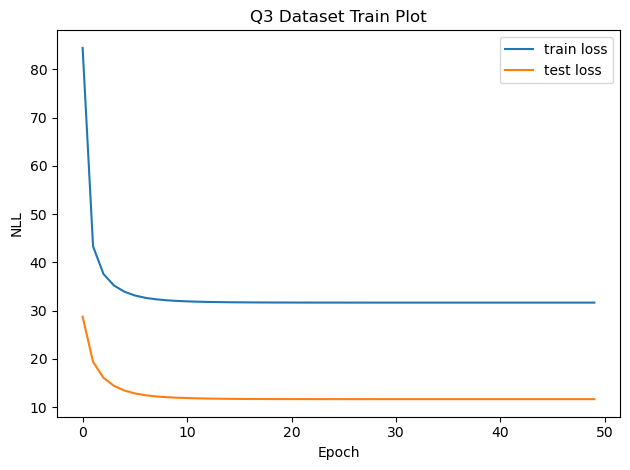

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


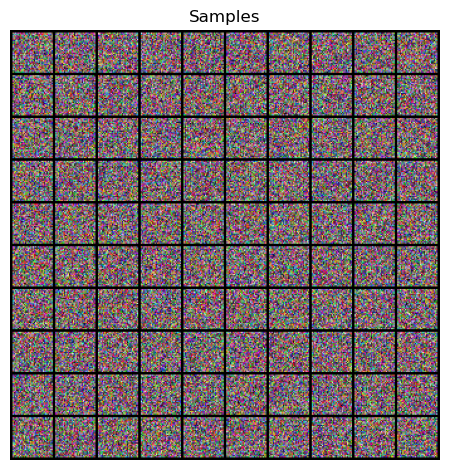

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


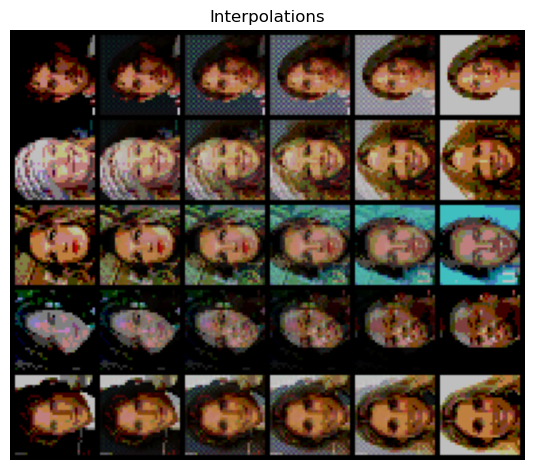

In [52]:
q3_save_results(q4_b, 'bonus_b')

# IAF

In [53]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.utils.weight_norm as wn
import torch.distributions as D


def logistic_ll(mean, logscale, sample, binsize=1 / 256.0):
    scale = torch.exp(logscale)
    sample = (torch.floor(sample / binsize) * binsize - mean) / scale
    logp = torch.log(torch.sigmoid(sample + binsize / scale) - torch.sigmoid(sample) + 1e-7)
    return logp.sum(dim=(1,2,3))

def gaussian_ll(mean, logscale, sample):
    logscale = logscale.expand_as(mean)
    dist = D.Normal(mean, torch.exp(logscale))
    logp = dist.log_prob(sample)
    return logp.sum(dim=(1,2,3))


class MaskedConv2d(nn.Conv2d):
    def __init__(self, mask_type, *args, **kwargs):
        super(MaskedConv2d, self).__init__(*args, **kwargs)
        assert mask_type in {'A', 'B'}
        self.register_buffer('mask', self.weight.data.clone())
        _, _, kH, kW = self.weight.size()
        self.mask.fill_(1)
        self.mask[:, :, kH // 2, kW // 2 + (mask_type == 'B'):] = 0
        self.mask[:, :, kH // 2 + 1:] = 0

    def forward(self, x):
        self.weight.data *= self.mask
        return super(MaskedConv2d, self).forward(x)

class ARMultiConv2d(nn.Module):
    def __init__(self, n_h, n_out, h_size=64, z_size=32, nl=F.elu):
        super(ARMultiConv2d, self).__init__()
        self.nl = nl

        convs, out_convs = [], []

        for i, size in enumerate(n_h):
            convs     += [MaskedConv2d('A' if i == 0 else 'B', z_size if i == 0 else h_size, h_size, 3, 1, 1)]
        for i, size in enumerate(n_out):
            out_convs += [MaskedConv2d('B', h_size, z_size, 3, 1, 1)]

        self.convs = nn.ModuleList(convs)
        self.out_convs = nn.ModuleList(out_convs)


    def forward(self, x, context):
        for i, conv_layer in enumerate(self.convs):
            x = conv_layer(x)
            if i == 0: 
                x += context
            x = self.nl(x)

        return [conv_layer(x) for conv_layer in self.out_convs]


class IAFLayer(nn.Module):
    def __init__(self, downsample, iaf=1, h_size=64, z_size=32):
        super(IAFLayer, self).__init__()
        n_in  = h_size
        n_out = h_size * 2 + z_size * 2
        
        self.z_size = z_size
        self.h_size = h_size
        self.iaf    = iaf
        self.ds     = downsample

        if downsample:
            stride, padding, filter_size = 2, 1, 4
            self.down_conv_b = wn(nn.ConvTranspose2d(h_size + z_size, h_size, 4, 2, 1))
        else:
            stride, padding, filter_size = 1, 1, 3
            self.down_conv_b = wn(nn.Conv2d(h_size + z_size, h_size, 3, 1, 1))

        # create modules for UP pass: 
        self.up_conv_a = wn(nn.Conv2d(n_in, n_out, filter_size, stride, padding))
        self.up_conv_b = wn(nn.Conv2d(h_size, h_size, 3, 1, 1))

        # create modules for DOWN pass: 
        self.down_conv_a  = wn(nn.Conv2d(n_in, 4 * self.z_size + 2 * self.h_size, 3, 1, 1))

        if iaf:
            self.down_ar_conv = ARMultiConv2d([h_size] * 2, [z_size] * 2)


    def up(self, img):
        x = F.elu(img)
        out_conv = self.up_conv_a(x)
        self.qz_mean, self.qz_logsd, self.up_context, h = out_conv.split([self.z_size] * 2 + [self.h_size] * 2, 1)

        h = F.elu(h)
        h = self.up_conv_b(h)

        if self.ds:
            img = F.interpolate(img, scale_factor=0.5)

        return img + 0.1 * h
        

    def down(self, img, free_bits=0.1, sample=False):
        x = F.elu(img)
        x = self.down_conv_a(x)
        
        pz_mean, pz_logsd, rz_mean, rz_logsd, down_context, h_det = x.split([self.z_size] * 4 + [self.h_size] * 2, 1)

        prior = D.Normal(pz_mean, torch.exp(2 * pz_logsd))
            
        if sample:
            z = prior.rsample()
            kl = kl_obj = torch.zeros(img.size(0)).to(img.device)
        else:
            posterior = D.Normal(rz_mean + self.qz_mean, torch.exp(rz_logsd + self.qz_logsd))
            
            z = posterior.rsample()
            logqs = posterior.log_prob(z) 
            context = self.up_context + down_context

            if self.iaf:
                x = self.down_ar_conv(z, context) 
                arw_mean, arw_logsd = x[0] * 0.1, x[1] * 0.1
                z = (z - arw_mean) / torch.exp(arw_logsd)
            
                # the density at the new point is the old one + determinant of transformation
                logq = logqs
                logqs += arw_logsd

            logps = prior.log_prob(z) 
            kl = logqs - logps

            # free bits (doing as in the original repo, even if weird)
            kl_obj = kl.sum(dim=(-2, -1)).mean(dim=0, keepdim=True)
            kl_obj = kl_obj.clamp(min=free_bits)
            kl_obj = kl_obj.expand(kl.size(0), -1)
            kl_obj = kl_obj.sum(dim=1)

            # sum over all the dimensions, but the batch
            kl = kl.sum(dim=(1,2,3))

        h = torch.cat((z, h_det), 1)
        h = F.elu(h)

        if self.ds:
            img = F.interpolate(img, scale_factor=2.)
        
        h = self.down_conv_b(h)

        return img + 0.1 * h, kl, kl_obj 


class VAE(nn.Module):
    def __init__(self, h_size=64, depth=2, n_blocks=4):
        super(VAE, self).__init__()
        self.h = torch.nn.Parameter(torch.zeros(h_size))
        self.dec_log_stdv = torch.nn.Parameter(torch.Tensor([0.]))

        layers = []
        # build network
        for i in range(depth):
            layer = []

            for j in range(n_blocks):
                downsample = (i > 0) and (j == 0)
                layer += [IAFLayer(downsample)]

            layers += [nn.ModuleList(layer)]

        self.layers = nn.ModuleList(layers) 
        
        self.first_conv = nn.Conv2d(3, h_size, 4, 2, 1)
        self.last_conv = nn.ConvTranspose2d(h_size, 3, 4, 2, 1)

    def forward(self, img):
        # assumes img is \in [-0.5, 0.5]
        x = self.first_conv(img)
        kl, kl_obj = 0., 0.

        h = self.h.view(1, -1, 1, 1)

        for layer in self.layers:
            for sub_layer in layer:
                x = sub_layer.up(x)

        h = h.expand_as(x)
        self.hid_shape = x[0].size()

        for layer in reversed(self.layers):
            for sub_layer in reversed(layer):
                h, curr_kl, curr_kl_obj = sub_layer.down(h)
                kl     += curr_kl
                kl_obj += curr_kl_obj

        x = F.elu(h)
        x = self.last_conv(x)
        
        x = x.clamp(min=-0.5 + 1. / 512., max=0.5 - 1. / 512.)

        log_pxz = gaussian_ll(x, self.dec_log_stdv, sample=img)

        return x, kl, kl_obj, log_pxz

    def sample(self, num_samples):
        z = self.prior.sample([num_samples, 3, 32, 32])
        return self.g(z)
    
    def cond_sample(self, img):
        # assumes img is \in [-0.5, 0.5] 
        x = self.first_conv(img)
        kl, kl_obj = 0., 0.

        h = self.h.view(1, -1, 1, 1)

        for layer in self.layers:
            for sub_layer in layer:
                x = sub_layer.up(x)

        h = h.expand_as(x)
        self.hid_shape = x[0].size()

        outs = []

        current = 0
        for i, layer in enumerate(reversed(self.layers)):
            for j, sub_layer in enumerate(reversed(layer)):
                h, curr_kl, curr_kl_obj = sub_layer.down(h)
                
                h_copy = h
                again = 0
                # now, sample the rest of the way:
                for layer_ in reversed(self.layers):
                    for sub_layer_ in reversed(layer_):
                        if again > current:
                            h_copy, _, _ = sub_layer_.down(h_copy, sample=True)
                        
                        again += 1
                        
                x = F.elu(h_copy)
                x = self.last_conv(x)
                x = x.clamp(min=-0.5 + 1. / 512., max=0.5 - 1. / 512.)
                outs += [x]

                current += 1

        return outs

In [54]:
parser = argparse.ArgumentParser()

parser.add_argument("--output_dir", type=str, default="/root/dev/deepul/exp")
parser.add_argument("--data_dir", type=str, default="/root/dev/deepul/homeworks/hw2/data")
parser.add_argument("--num_epoch", type=int, default=100)
parser.add_argument("--batch_size", type=int, default=128)
parser.add_argument("--save_epoch_step", type=int, default=50)

args = parser.parse_args([])

In [55]:
class Solver(object):
    def __init__(self, learning_rate=1e-5, n_epochs=400, args=None):
        self.n_epochs = n_epochs
        self.learning_rate = learning_rate
        self.output_dir = args.output_dir
        self.batch_size = args.batch_size
        self.save_epoch_step = args.save_epoch_step
        
        self.train_loader, self.val_loader = self.create_loaders()
        self.n_batches_in_epoch = len(self.train_loader)

    def build(self):
        self.flow = RealNVP().cuda()
        
        self.optimizer = torch.optim.Adam(self.flow.parameters(), lr=self.learning_rate)
        self.scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=self.optimizer, lr_lambda=lambda epoch:0.99**epoch)

    def create_loaders(self):
        train, test = get_q3_data()
        train = np.transpose(train, axes=[0, 3, 1, 2])  # NCHW 20000 x 3 x 32 x 32
        test = np.transpose(test, axes=[0, 3, 1, 2])  # NCHW 6838 x 3 x 32 x 32

        train_loader = DataLoader(train, batch_size=self.batch_size, pin_memory=False)
        test_loader = DataLoader(test, batch_size=self.batch_size, pin_memory=False)
        return train_loader, test_loader

    def preprocess(self, x, reverse=False, dequantize=True):
        if reverse:  # doesn't map back to [0, 4]
            x = 1.0 / (1 + torch.exp(-x))
            x -= 0.05
            x /= 0.9
            return x
        else:
            # dequantization
            if dequantize:
                x += torch.distributions.Uniform(0.0, 1.0).sample(x.shape).cuda()
            x /= 4.0

            # logit operation
            x *= 0.9
            x += 0.05
            logit = torch.log(x) - torch.log(1.0 - x)
            log_det = torch.nn.functional.softplus(logit) + torch.nn.functional.softplus(-logit) \
                      + torch.log(torch.tensor(0.9)) - torch.log(torch.tensor(4.0))
            return logit, torch.sum(log_det, dim=(1, 2, 3))

    def train(self):
        train_losses = []
        val_losses = []
        for epoch_i in range(self.n_epochs):
            epoch_i += 1

            self.flow.train()
            self.batch_loss_history = []

            for batch_i, image in enumerate(tqdm(
                    self.train_loader, desc='Batch', leave=False)):

                batch_i += 1
                # [batch_size, 3, 32, 32]
                image = Variable(image).cuda()
                logit_x, log_det = self.preprocess(image.float())
                log_prob = self.flow.log_prob(logit_x)
                log_prob += log_det

                batch_loss = -torch.mean(log_prob) / (3.0 * 32.0 * 32.0)

                self.optimizer.zero_grad()
                batch_loss.backward()
                self.optimizer.step()
                self.scheduler.step()

                batch_loss = float(batch_loss.data)
                self.batch_loss_history.append(batch_loss)

            epoch_loss = np.mean(self.batch_loss_history)
            tqdm.write(f'Epoch {epoch_i} Loss: {epoch_loss:.2f}')

            if epoch_i % self.save_epoch_step == 0:
                self.save_model_module(os.path.join(self.output_dir, "realnvp{}.model".format(str(epoch_i))))
            train_losses.append(epoch_loss)
            val_losses.append(self.get_loss(self.val_loader))
            np.save(os.path.join(self.output_dir, "train_losses.npy"), np.array(train_losses))
            np.save(os.path.join(self.output_dir, "val_losses.npy"), np.array(val_losses))

        self.save_model_module(os.path.join(self.output_dir, "q3_a_ckpt_{}_model_module.pt".format(self.n_epochs)))
        self.save_model_state_dict(os.path.join(self.output_dir, "q3_a_ckpt_{}_model_state_dict.pt".format(self.n_epochs)))
        self.save_model_module_state_dict(os.path.join(self.output_dir, "q3_a_ckpt_{}_model_module_state_dict.pt".format(self.n_epochs)))
        return train_losses, val_losses

    def get_loss(self, loader):
        """Compute error on provided data set"""
        errors = []
        # cuda.synchronize()
        start = time.time()

        self.flow.eval()

        for image in loader:
            with torch.no_grad():
                image = image.cuda()
                logit_x, log_det = self.preprocess(image.float())
                log_prob = self.flow.log_prob(logit_x)
                log_prob += log_det

                loss = -torch.mean(log_prob) / (3.0 * 32.0 * 32.0)
                error = float(loss.data)
                errors.append(error)

        # cuda.synchronize()
        time_test = time.time() - start
        log_string = f'Calc done! | It took {time_test:.1f}s | '
        log_string += f'Loss: {np.mean(errors):.2f}'
        tqdm.write(log_string)
        return np.mean(errors)

    def sample(self, num_samples):
        with torch.no_grad():
            raw_samples = self.flow.sample(num_samples).cpu()
            samples = self.preprocess(raw_samples, reverse=True)
            return samples.cpu().numpy()

    def interpolate(self):
        self.flow.eval()
        good = [5, 13, 16, 19, 22]
        indices = []
        for index in good:
            indices.append(index*2)
            indices.append(index*2+1)
        with torch.no_grad():
            actual_images = next(iter(self.val_loader))[indices].to('cpu')
            assert actual_images.shape[0] % 2 == 0
            logit_actual_images, _ = self.preprocess(actual_images.float(), dequantize=False)
            latent_images, _ = self.flow.f(logit_actual_images)
            latents = []
            for i in range(0, actual_images.shape[0], 2):
                a = latent_images[i:i+1]
                b = latent_images[i + 1:i+2]
                diff = (b - a)/5.0
                latents.append(a)
                for j in range(1, 5):
                    latents.append(a + diff * float(j))
                latents.append(b)
            latents = torch.cat(latents, dim=0)
            logit_results = self.flow.g(latents)
            results = self.preprocess(logit_results, reverse=True)
            return results.cpu().numpy()
    
    def save_model(self, filename):
        if self.local_rank == 0:
            torch.save(self.flow, filename)
    
    def save_model_module(self, filename):
        if self.local_rank == 0:
            torch.save(self.flow.module, filename)
    
    def load_model(self, filename):
        self.flow = torch.load(filename, map_location="cuda")

class IAFSolver(Solver):
    def __init__(self, learning_rate=1e-5, n_epochs=400, args=None):
        super().__init__(learning_rate, n_epochs, args)

    def build(self):
        self.model = VAE().cuda()
        self.optimizer = torch.optim.Adamax(self.model.parameters(), lr=self.learning_rate)

    def train(self):
        train_losses = []
        val_losses = []
        for epoch_i in range(self.n_epochs):
            epoch_i += 1

            self.model.train()
            self.batch_loss_history = []

            for batch_i, image in enumerate(tqdm(
                    self.train_loader, desc='Batch', leave=False)):

                batch_i += 1
                # [batch_size, 3, 32, 32]
                image = Variable(image).float().contiguous().cuda()
                
                x, kl, kl_obj, log_pxz = self.model(image)

                loss = -(kl_obj - log_pxz).sum() / x.size(0)
                elbo = (kl - log_pxz)
                bpd = elbo / (32 * 32 * 3 * np.log(2.))

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                batch_loss = float(loss.data)
                self.batch_loss_history.append(batch_loss)

            epoch_loss = np.mean(self.batch_loss_history)
            tqdm.write(f'Epoch {epoch_i} Loss: {epoch_loss:.2f}')

            train_losses.append(epoch_loss)
            val_loss = self.get_loss(self.val_loader)
            val_losses.append(val_loss)

            if epoch_i % self.save_epoch_step == 0:
                self.save_model_module(os.path.join(self.output_dir, "iaf_{}.pt".format(epoch_i)))
                np.save(os.path.join(self.output_dir, "iaf_train_losses_{}.npy".format(epoch_i)), np.array(train_losses))
                np.save(os.path.join(self.output_dir, "iaf_val_losses_{}.npy".format(epoch_i)), np.array(val_losses))

        return train_losses, val_losses

    def get_loss(self, loader):
        """Compute error on provided data set"""
        errors = []
        start = time.time()

        self.model.eval()

        for image in loader:
            with torch.no_grad():
                image = Variable(image).float().contiguous().cuda()

                x, kl, kl_obj, log_pxz = self.model(image)

                loss = (kl_obj - log_pxz).sum() / x.size(0)
                elbo = (kl - log_pxz)
                bpd = elbo / (32 * 32 * 3 * np.log(2.))

                error = float(loss.data)
                errors.append(error)

        # cuda.synchronize()
        time_test = time.time() - start
        log_string = f'Calc done! | It took {time_test:.1f}s | '
        log_string += f'Loss: {np.mean(errors):.2f}'
        tqdm.write(log_string)
        return np.mean(errors)

    def sample(self, num_samples):
        with torch.no_grad():
            raw_samples = self.model.sample(num_samples).cpu()
            samples = self.preprocess(raw_samples, reverse=True)
            return samples.cpu().numpy()

    def interpolate(self):
        self.model.eval()
        good = [5, 13, 16, 19, 22]
        indices = []
        for index in good:
            indices.append(index*2)
            indices.append(index*2+1)
        with torch.no_grad():
            actual_images = next(iter(self.val_loader))[indices].to('cpu')
            assert actual_images.shape[0] % 2 == 0
            logit_actual_images, _ = self.preprocess(actual_images.float(), dequantize=False)
            latent_images, _ = self.f(logit_actual_images)
            latents = []
            for i in range(0, actual_images.shape[0], 2):
                a = latent_images[i:i+1]
                b = latent_images[i + 1:i+2]
                diff = (b - a)/5.0
                latents.append(a)
                for j in range(1, 5):
                    latents.append(a + diff * float(j))
                latents.append(b)
            latents = torch.cat(latents, dim=0)
            logit_results = self.g(latents)
            results = self.preprocess(logit_results, reverse=True)
            return results.cpu().numpy()

    def save_model_module(self, filename):
        torch.save(self.model.module, filename)

    def load_model(self, filename):
        torch.load(filename, map_location="cuda")

    def save_model_module(self, filename):
        if self.local_rank == 0:
            torch.save(self.model, filename)

In [56]:
def iaf(train_data, test_data):
    """
    train_data: A (n_train, H, W, 3) uint8 numpy array of quantized images with values in {0, 1, 2, 3}
    test_data: A (n_test, H, W, 3) uint8 numpy array of binary images with values in {0, 1, 2, 3}

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 3) of samples with values in [0, 1]
    - a numpy array of size (30, H, W, 3) of interpolations with values in [0, 1].
    """

    """ YOUR CODE HERE """
    solver = IAFSolver(n_epochs=1, args=args)
    solver.build()
    
    ckpt = torch.load("/root/dev/deepul/exp/iaf_200.pt", map_location="cuda")
    solver.model = ckpt
    
    train_losses = np.load('/root/dev/deepul/exp/iaf_train_losses_200.npy')
    test_losses = np.load('/root/dev/deepul/exp/iaf_val_losses_200.npy')
    return train_losses, test_losses

In [59]:
def iaf_save_results(fn, part):
    data_dir = get_data_dir(2)
    train_data, test_data = load_pickled_data(join(data_dir, 'celeb.pkl'))

    train_losses, test_losses = fn(train_data, test_data)

    print(f'Final Test Loss: {test_losses[-1]:.4f}')
    save_training_plot(train_losses, test_losses, f'Q3 Dataset Train Plot',
                       f'results/q3_{part}_train_plot.png')

Final Test Loss: 5560.4538


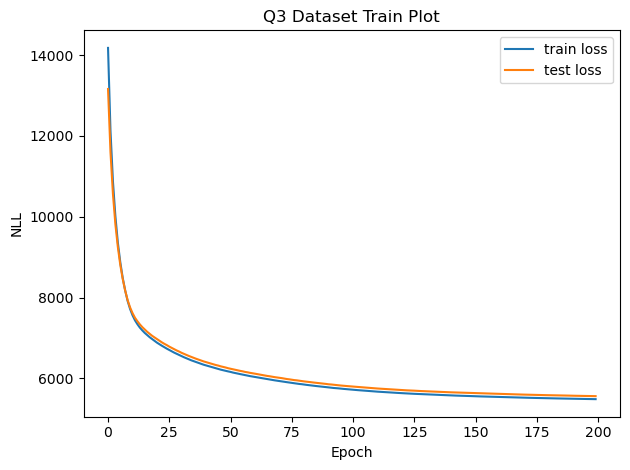

In [60]:
iaf_save_results(iaf, 'iaf')

# File Saving Utility


In [ ]:
# one way to save files
from google.colab import files
import os
import os.path as osp
for fname in os.listdir('results'):
    files.download('results/' + fname)